# Generate Spherical harmonics

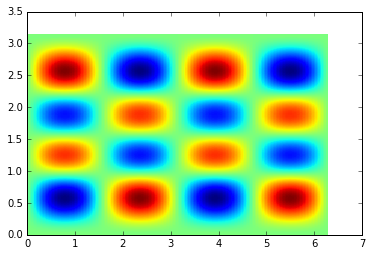

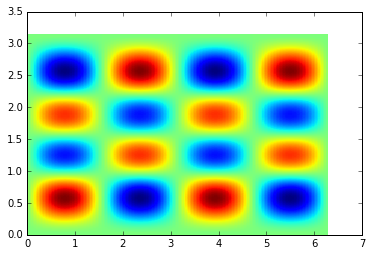

In [1]:
#Generate Spherical harmonics

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import special
%matplotlib inline


l=5    ;;;;l mode
m=2    ;;;;m represeantation

pix = 200
tabth = np.linspace(0, 2*np.pi, pix)
tabphi = np.linspace(0, np.pi, pix)
tab_Y = np.zeros( (pix,pix) )
tab_Y2 = np.zeros( (pix,pix) )

for i in range(len(tabth)):
    for j in range(len(tabphi)):
        tab_Y[i,j] = (sp.special.sph_harm(-m,l,tabth[i], tabphi[j])).imag
        tab_Y2[i,j] = (sp.special.sph_harm(m,l,tabth[i], tabphi[j])).imag
        
plt.pcolormesh(tabth, tabphi, np.transpose(tab_Y))
plt.show()
plt.pcolormesh(tabth, tabphi, np.transpose(tab_Y2))
plt.show()

# Blackbody spectrum


[MoviePy] Building file sinc_mpl.gif with imageio


100%|█████████▉| 501/502 [03:39<00:00,  2.44it/s]


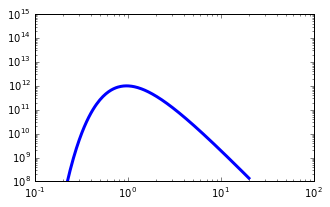

In [89]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
import mayavi.mlab as mlab
%matplotlib inline

def blackbody_lam(lam, T):
    """ Blackbody as a function of wavelength (um) and temperature (K).

    returns units of erg/s/cm^2/cm/Steradian
    """
    from scipy.constants import h,k,c
    lam = 1e-6 * lam # convert to metres
    return 2*h*c**2 / (lam**5 * (np.exp(h*c / (lam*k*T)) - 1))

nbt = 501

wa = np.linspace(0.1, 20, 1000)   # wavelengths in um
tab_T = np.linspace(3000, 8000, nbt)
tab_T = tab_T[::-1]

fps=50.

fig_mpl, ax = plt.subplots(1,figsize=(5,3), facecolor='white')
line, = ax.loglog(wa, blackbody_lam(wa, tab_T[0]), lw=3)
def make_frame_mpl(t):
    mlab.clf() # clear the figure (to reset the colors)
    #print t
    line.set_ydata (blackbody_lam(wa, tab_T[t*fps]))
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=nbt/fps)
animation.write_gif("sinc_mpl.gif", fps=fps)

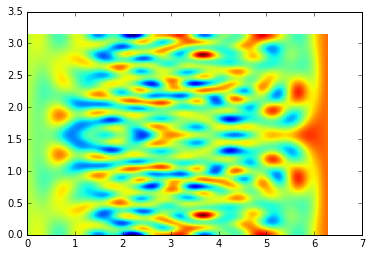

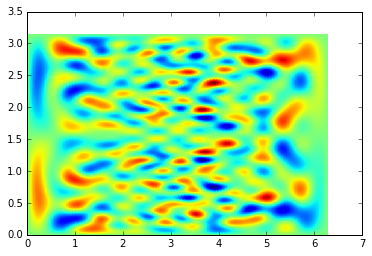

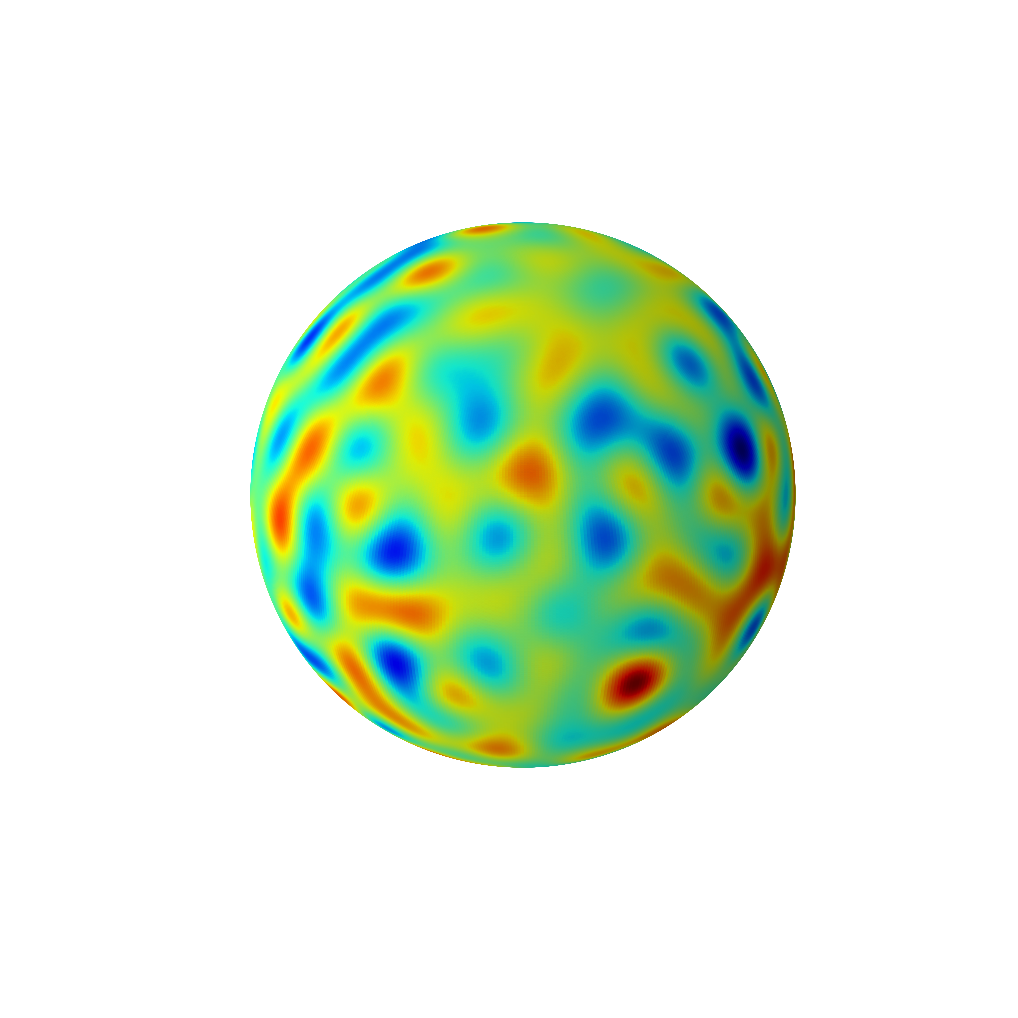

In [68]:
#Generate a map using some modes

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import special
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


lmin = 0
lmax = 20
nbl = lmax-lmin+1

pix = 500
phi_min = 0.   #full_map => phi_min=0
phi_max = np.pi  #full_map => phi_max=np.pi
th_min=0.      #full_map => th_min=0
th_max=2*np.pi     #full_map => th_max=2*np.pi
tabth = np.linspace(th_min,th_max , pix)
tabphi = np.linspace(0, np.pi, pix)
tabphi, tabth = np.meshgrid(tabphi, tabth)
tab_Y = np.zeros( (pix,pix) )
tab_Y2 = np.zeros( (pix,pix) )

tab_mapR = np.zeros( (pix,pix) )
tab_mapI = np.zeros( (pix,pix) )


for l in (np.linspace(lmin, lmax, nbl )):
    for m in(np.linspace(-l,l,2*l+1)):
        psy = np.random.rand(1)*2*np.pi
        rl = np.random.rand(1)*3
        ar = rl*np.cos(psy)
        ai = rl*np.sin(psy)
        tab_mapR = tab_mapR + ar* (sp.special.sph_harm(m,l,tabth, tabphi)).real
        #tab_mapI = tab_mapI + ai*(sp.special.sph_harm(m,l,tabth, tabphi)).imag
        
plt.pcolormesh(tabth, tabphi, np.transpose(tab_mapR))
plt.show()
#plt.pcolormesh(tabth, tabphi, np.transpose(tab_mapI))
#plt.show()

x = np.sin(tabphi) * np.cos(tabth)
y = np.sin(tabphi) * np.sin(tabth)
z = np.cos(tabphi)
fig = plt.figure(figsize=(18,18))

fmax, fmin = tab_mapR.max(), tab_mapR.min()
fcolors = (tab_mapR - fmin)/(fmax - fmin)

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.jet(fcolors))
ax.set_axis_off()
plt.show()

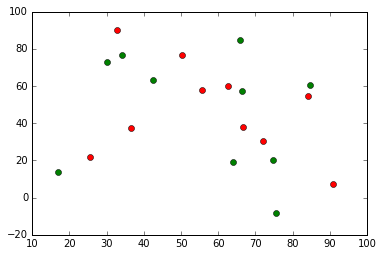

In [88]:
%matplotlib inline


box_x = 100
box_y = 100

nb_part = 10

tab_x = np.random.rand(nb_part) * box_x
tab_y = np.random.rand(nb_part) * box_y

tab_thetha = np.random.rand(nb_part) * 2*np.pi
tab_v = np.random.rand(nb_part) * 3.  + 1.

nb_t = 10
dt = 1.
plt.plot(tab_x, tab_y, 'ro', color='red')


for t in range(nb_t):
    tab_x = tab_x + dt * tab_v*np.cos(tab_thetha)
    tab_y = tab_y + dt * tab_v*np.sin(tab_thetha)
    tmp = np.where( (tab_x > box_x) | (tab_x < 0) )
    tab_x[tmp] = tab_x[tmp] - 2* dt * tab_v[tmp]*np.cos(tab_thetha[tmp])
    tmp = np.where( (tab_y > box_y) | (tab_y < 0) )
    tab_y[tmp] = tab_y[tmp] + dt * tab_v[tmp]*np.sin(tab_thetha[tmp])

plt.plot(tab_x, tab_y, 'ro', color='green')

# Free Protons and Electrons 


[MoviePy] Building file Protons_Electrons_free.gif with imageio


100%|█████████▉| 300/301 [00:34<00:00,  8.88it/s]


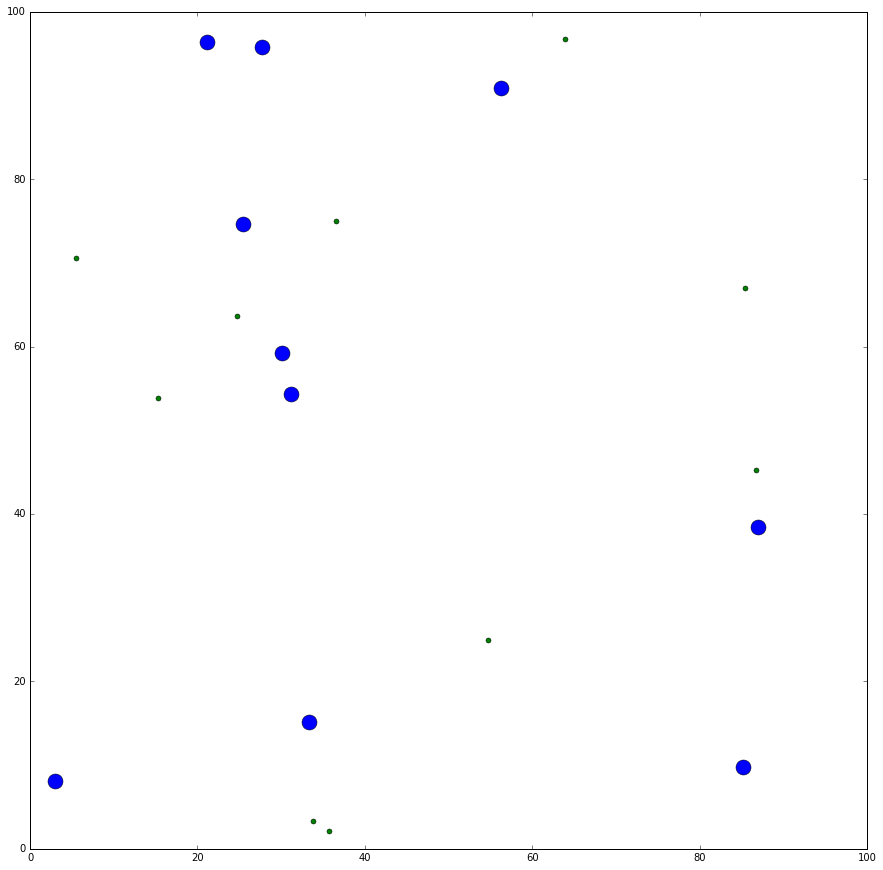

In [13]:
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
import mayavi.mlab as mlab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


###Part to define the initial conditions for the particles

Min_v_e = 1
Min_v_p = 0.5

fact_v_e = 3
fact_v_p = 1.5

nb_part = 10    ###@number of protons and electrons

##protons
p_x = np.random.rand(nb_part) * box_x
p_y = np.random.rand(nb_part) * box_y

p_thetha = np.random.rand(nb_part) * 2*np.pi
p_v = np.random.rand(nb_part) * fact_v_p  + Min_v_p

##electrons
e_x = np.random.rand(nb_part) * box_x
e_y = np.random.rand(nb_part) * box_y

e_thetha = np.random.rand(nb_part) * 2*np.pi
e_v = np.random.rand(nb_part) * fact_v_e  + Min_v_e






fps=30.
t_tot=10

nbt = t_tot * fps
dt = .5



fig_mpl, ax = plt.subplots(1,figsize=(15,15), facecolor='white')

ax.plot(p_x, p_y, marker=u'o', color='blue', markersize=15, linestyle='None')  ####protons
ax.plot(e_x, e_y, marker=u'o', color='green', markersize=5, linestyle='None')  ####electrons

ax.set_xlim( (0, box_x) )
ax.set_ylim( (0, box_y) )
def make_frame_mpl(t):
    global p_x, p_y, p_thetha, e_x, e_y, e_thetha
    #mlab.clf() # clear the figure (to reset the colors)
    ax.clear()
    #ax.axis('off')
    p_x = p_x + dt * p_v*np.cos(p_thetha)
    p_y = p_y + dt * p_v*np.sin(p_thetha)
    e_x = e_x + dt * e_v*np.cos(e_thetha)
    e_y = e_y + dt * e_v*np.sin(e_thetha)
    
    tmp = np.where( (p_x > box_x) | (p_x < 0) )
    p_x[tmp] = p_x[tmp] - 2* dt * p_v[tmp]*np.cos(p_thetha[tmp])
    p_thetha[tmp] = np.pi-p_thetha[tmp]
    tmp = np.where( (p_y > box_y) | (p_y < 0) )
    p_y[tmp] = p_y[tmp] -2* dt * p_v[tmp]*np.sin(p_thetha[tmp])
    p_thetha[tmp] = 2*np.pi-p_thetha[tmp]
    
    tmp = np.where( (e_x > box_x) | (e_x < 0) )
    e_x[tmp] = e_x[tmp] - 2* dt * e_v[tmp]*np.cos(e_thetha[tmp])
    e_thetha[tmp] = np.pi-e_thetha[tmp]
    tmp = np.where( (e_y > box_y) | (e_y < 0) )
    e_y[tmp] = e_y[tmp] -2* dt * e_v[tmp]*np.sin(e_thetha[tmp])
    e_thetha[tmp] = 2*np.pi-e_thetha[tmp]
    
    
    ax.plot(p_x, p_y, marker=u'o', color='blue', markersize=15, linestyle='None')  ####protons
    ax.plot(e_x, e_y, marker=u'o', color='green', markersize=5, linestyle='None')  ####electrons
    ax.set_xlim( (0, box_x) )
    ax.set_ylim( (0, box_y) )
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=nbt/fps)
animation.write_gif("Protons_Electrons_free.gif", fps=fps)

# Interacting Protons and Electrons 


[MoviePy] Building file Protons_Electrons_Interact.gif with imageio


 99%|█████████▉| 150/151 [00:20<00:00,  8.29it/s]


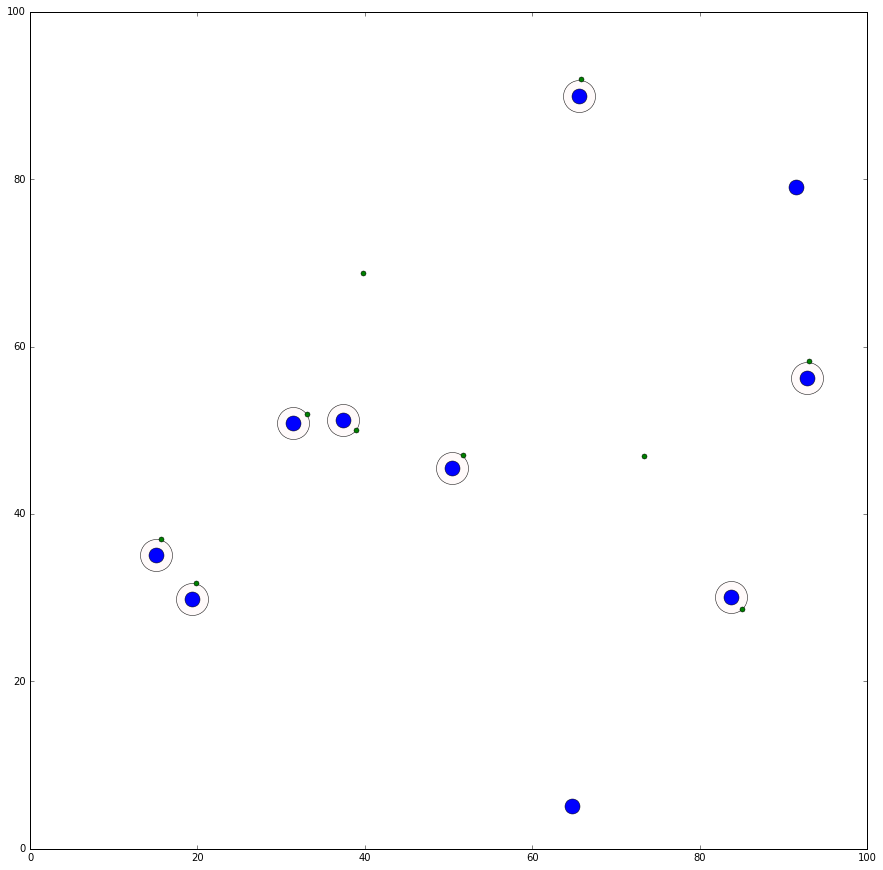

In [110]:
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
import mayavi.mlab as mlab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


box_x = 100
box_y = 100


###Part to define the initial conditions for the particles

Min_v_e = 1
Min_v_p = 0.5


fact_v_e = 3
fact_v_p = 1.5


nb_part = 10    ###@number of protons and electrons
arr_ind = np.arange(nb_part)

##protons
p_x = np.random.rand(nb_part) * box_x
p_y = np.random.rand(nb_part) * box_y

p_thetha = np.random.rand(nb_part) * 2*np.pi
p_v = np.random.rand(nb_part) * fact_v_p  + Min_v_p

##electrons
e_x = np.random.rand(nb_part) * box_x
e_y = np.random.rand(nb_part) * box_y

e_thetha = np.random.rand(nb_part) * 2*np.pi
e_v = np.random.rand(nb_part) * fact_v_e  + Min_v_e



###Interction parameter

e_with = np.zeros(nb_part, int)-1  ##Array to know with which proton is associated the electron
p_with = np.zeros(nb_part, int)-1  ##Array to know with which electron is associated the proton
e_phi = np.random.rand(nb_part)*2*np.pi

cross_pe = 5.  ###define the distance to interact
cross_pp = 3.
cross_ee = 3.

fps=30.
t_tot=5

nbt = t_tot * fps
dt = 1.



fig_mpl, ax = plt.subplots(1,figsize=(15,15), facecolor='white')

ax.plot(p_x, p_y, marker=u'o', color='blue', markersize=15, linestyle='None')  ####protons
ax.plot(e_x, e_y, marker=u'o', color='green', markersize=5, linestyle='None')  ####electrons

ax.set_xlim( (0, box_x) )
ax.set_ylim( (0, box_y) )



def make_frame_mpl(t):
    global p_x, p_y, p_thetha, p_v,  e_x, e_y, e_thetha, e_v
    #mlab.clf() # clear the figure (to reset the colors)
    ax.clear()
    #ax.axis('off')
    
    p_x = p_x + dt * p_v*np.cos(p_thetha)
    p_y = p_y + dt * p_v*np.sin(p_thetha)
    
    tmp_n = np.where(e_with < 0)
    e_x[tmp_n] = e_x[tmp_n] + dt * e_v[tmp_n]*np.cos(e_thetha[tmp_n])
    e_y[tmp_n] = e_y[tmp_n] + dt * e_v[tmp_n]*np.sin(e_thetha[tmp_n])
    
    tmp_y = np.where(e_with >= 0)
    e_x[tmp_y] = p_x[e_with[tmp_y]] + 2*np.cos(2*t+e_phi[tmp_y])
    e_y[tmp_y] = p_y[e_with[tmp_y]]+ 2*np.sin(2*t+e_phi[tmp_y])
    
    tmp = np.where( (p_x > box_x) | (p_x < 0) )
    p_x[tmp] = p_x[tmp] - 2* dt * p_v[tmp]*np.cos(p_thetha[tmp])
    p_thetha[tmp] = np.pi-p_thetha[tmp]
    tmp = np.where( (p_y > box_y) | (p_y < 0) )
    p_y[tmp] = p_y[tmp] -2* dt * p_v[tmp]*np.sin(p_thetha[tmp])
    p_thetha[tmp] = 2*np.pi-p_thetha[tmp]
    
    tmp = np.where( (e_x > box_x) | (e_x < 0) )
    e_x[tmp] = e_x[tmp] - 2* dt * e_v[tmp]*np.cos(e_thetha[tmp])
    e_thetha[tmp] = np.pi-e_thetha[tmp]
    tmp = np.where( (e_y > box_y) | (e_y < 0) )
    e_y[tmp] = e_y[tmp] -2* dt * e_v[tmp]*np.sin(e_thetha[tmp])
    e_thetha[tmp] = 2*np.pi-e_thetha[tmp]
    
    ###Part to search interacting electrons with free protons
 
    for i in range(nb_part):
        tmp_pn = np.where( p_with < 0 )    ###select only free protons
        if len(p_with[tmp_pn]) > 0 :       ###Continue only if there are free protons
            if e_with[i] < 0:
                tab_dist_pe = np.sqrt( np.power(p_x[tmp_pn] - e_x[i],2) + np.power(p_y[tmp_pn] - e_y[i],2) )
                if tab_dist_pe.min() < cross_pe: 
                    ind_min = int(np.argmin(tab_dist_pe))
                    tab = arr_ind[tmp_pn]
                    e_with[i] = tab[ind_min]
                    p_with[e_with[i]] = i
                
    
    
    ax.plot(p_x[e_with[tmp_y]], p_y[e_with[tmp_y]], marker=u'o', color='snow', markersize=32, linestyle='None')
    ax.plot(p_x, p_y, marker=u'o', color='blue', markersize=15, linestyle='None')  ####protons
    ax.plot(e_x, e_y, marker=u'o', color='green', markersize=5, linestyle='None')  ####electrons
    
    
    ax.set_xlim( (0, box_x) )
    ax.set_ylim( (0, box_y) )
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=nbt/fps)
animation.write_gif("Protons_Electrons_Interact.gif", fps=fps)


(u'o', u'v', u'^', u'<', u'>', u'8', u's', u'p', u'*', u'h', u'H', u'D', u'd')


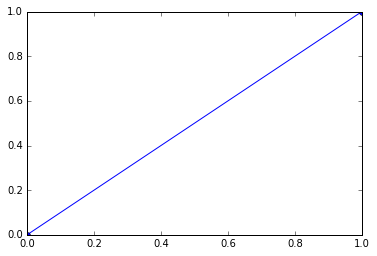

In [25]:
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
%matplotlib inline



print mlines.Line2D.filled_markers
plt.plot( (0,1), (0,1), marker=u'o' )
#plt.plot(0.3,0.4, marker=u'v', markersize=10)
plt.Circle( (0.3,0.4),  radius=10, color='g', fill=False)
plt.show()

<IPython.core.display.Javascript object>


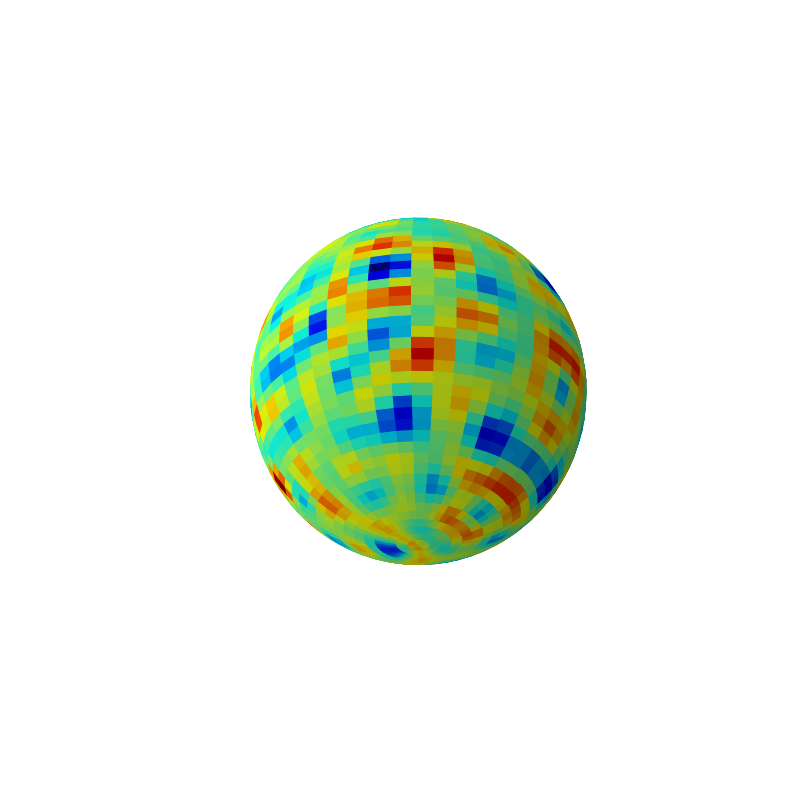

In [3]:
#Generate a map using some modes

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import special
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib notebook

lmin = 0
lmax = 20
nbl = lmax-lmin+1

pix = 50
phi_min = 0.   #full_map => phi_min=0
phi_max = np.pi  #full_map => phi_max=np.pi
th_min=0.      #full_map => th_min=0
th_max=2*np.pi     #full_map => th_max=2*np.pi
tabth = np.linspace(th_min,th_max , pix)
tabphi = np.linspace(0, np.pi, pix)
tabphi, tabth = np.meshgrid(tabphi, tabth)
tab_Y = np.zeros( (pix,pix) )
tab_Y2 = np.zeros( (pix,pix) )

tab_mapR = np.zeros( (pix,pix) )
tab_mapI = np.zeros( (pix,pix) )


for l in (np.linspace(lmin, lmax, nbl )):
    for m in(np.linspace(-l,l,2*l+1)):
        psy = np.random.rand(1)*2*np.pi
        rl = np.random.rand(1)*3
        ar = rl*np.cos(psy)
        ai = rl*np.sin(psy)
        tab_mapR = tab_mapR + ar* (sp.special.sph_harm(m,l,tabth, tabphi)).real
        #tab_mapI = tab_mapI + ai*(sp.special.sph_harm(m,l,tabth, tabphi)).imag
        
#plt.pcolormesh(tabth, tabphi, np.transpose(tab_mapR))
#plt.show()
#plt.pcolormesh(tabth, tabphi, np.transpose(tab_mapI))
#plt.show()

x = np.sin(tabphi) * np.cos(tabth)
y = np.sin(tabphi) * np.sin(tabth)
z = np.cos(tabphi)
fig = plt.figure(figsize=(10,10))

fmax, fmin = tab_mapR.max(), tab_mapR.min()
fcolors = (tab_mapR - fmin)/(fmax - fmin)

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.jet(fcolors))
ax.set_axis_off()
plt.show()

In [86]:
import numpy as np

tab = np.arange(16)
print tab
a = np.linspace(0,15, 16)
print a.argmin()

test = int(tab[ np.argmax(a)])
test2 = 15
test?

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
0


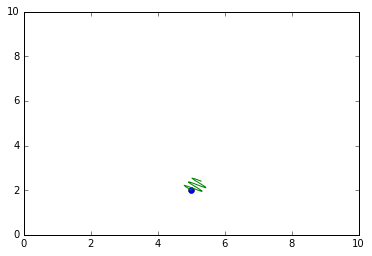

In [109]:
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
import mayavi.mlab as mlab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



tab_x = np.linspace(0,10, 11)
tab_y = np.linspace(0,10, 11)
plt.plot(5,2, 'o')
plt.xlim((0,10))
plt.ylim((0,10))

thetha = 0.3*np.pi
fact = 0.3
tab_sin = np.sin(np.linspace(0,5*np.pi,20))
tab_support = np.linspace(0,.5,20)

x_draw = np.cos(thetha)*tab_support - np.sin(thetha)*fact*tab_sin
y_draw = np.sin(thetha)*tab_support + np.cos(thetha)*fact*tab_sin

plt.plot(x_draw+5, y_draw+2, color='green')
plt.show()
    

# Photons, protons and electrons


[MoviePy] Building file Photons_Protons_Electrons_Interact.gif with imageio


100%|█████████▉| 1200/1201 [03:03<00:00,  7.21it/s]


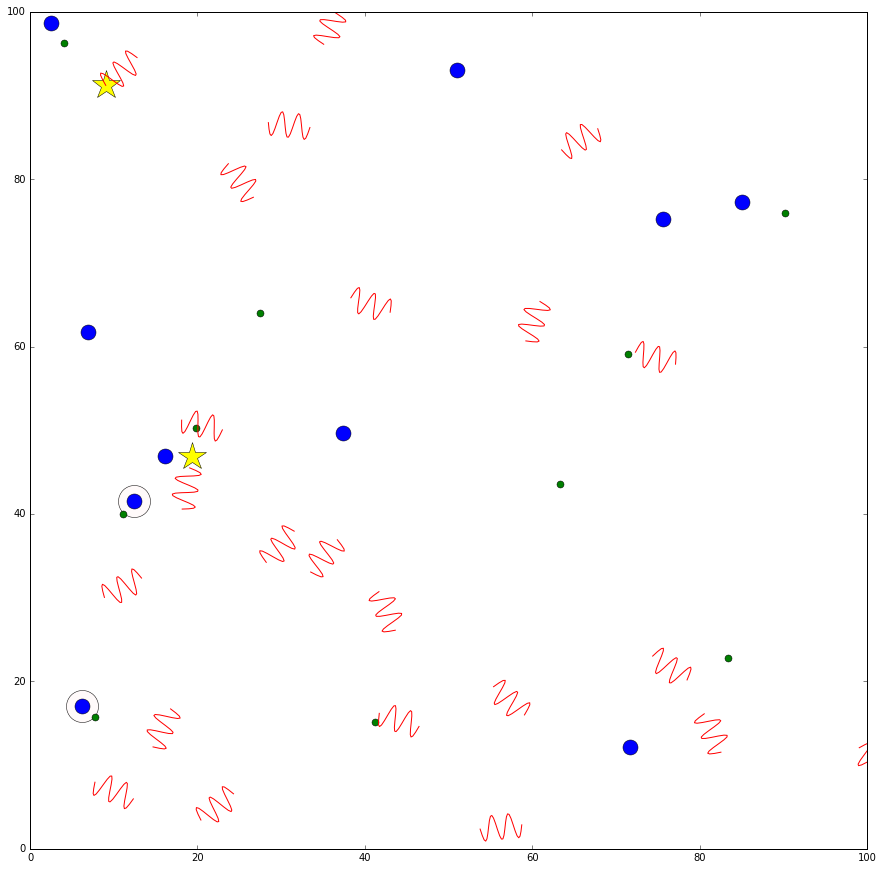

In [7]:
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
import mayavi.mlab as mlab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###Video params
fps=20.
t_tot=60    ##time in secondes

nbt = t_tot * fps
dt = .5

###Box size

box_x = 100
box_y = 100


###factor to draw photons
fact = 1.5
tab_sin = fact*np.sin(np.linspace(0,5*np.pi,30))
tab_support = np.linspace(0,5,30)

###Part to define the initial conditions for the particles

Min_v_e = 1
Min_v_p = 0.3
Min_v_ph = 3

fact_v_e = 2
fact_v_p = 1.5
#fact_v_ph = 4

nb_part = 10    ###@number of protons and electrons
nb_photons = 20
arr_ind = np.arange(nb_part+nb_photons)

##protons
p_x = np.random.rand(nb_part) * box_x
p_y = np.random.rand(nb_part) * box_y

p_thetha = np.random.rand(nb_part) * 2*np.pi
p_v = np.random.rand(nb_part) * fact_v_p  + Min_v_p

##electrons
e_x = np.random.rand(nb_part) * box_x
e_y = np.random.rand(nb_part) * box_y

e_thetha = np.random.rand(nb_part) * 2*np.pi
e_v = np.random.rand(nb_part) * fact_v_e  + Min_v_e

##photons (can be nb_part photons more at the maximum)
ph_x = np.random.rand(nb_photons+nb_part) * box_x
ph_y = np.random.rand(nb_photons+nb_part) * box_y

ph_thetha = np.random.rand(nb_photons+nb_part) * 2*np.pi
ph_v = np.zeros(nb_photons+nb_part) + Min_v_ph

ph_exist = np.zeros(nb_photons+nb_part,int)+1   ###A photon still exist
ph_exist[nb_photons:]=0

ph_appear = np.zeros(nb_photons+nb_part)  ###Array to draw a star at the apparition place for Nframes
ph_x_appear = np.zeros(nb_photons+nb_part)
ph_y_appear = np.zeros(nb_photons+nb_part)
Nframes = 10

###Interction parameter

e_with = np.zeros(nb_part, int)-1  ##Array to know with which proton is associated the electron
p_with = np.zeros(nb_part, int)-1  ##Array to know with which electron is associated the proton
e_phi = np.random.rand(nb_part)*2*np.pi


cross_pe = 3.  ###define the distance to interact
cross_pp = 3.
cross_ee = 3.
cross_phe = 3




fig_mpl, ax = plt.subplots(1,figsize=(15,15), facecolor='white')

ax.plot(p_x, p_y, marker=u'o', color='blue', markersize=15, linestyle='None')  ####protons
ax.plot(e_x, e_y, marker=u'o', color='green', markersize=5, linestyle='None')  ####electrons

ax.set_xlim( (0, box_x) )
ax.set_ylim( (0, box_y) )



def make_frame_mpl(t):
    global p_x, p_y, p_thetha, p_v,  e_x, e_y, e_thetha, e_v, ph_x, ph_y, ph_thetha, ph_v
    #mlab.clf() # clear the figure (to reset the colors)
    ax.clear()
    #ax.axis('off')
    
    p_x = p_x + dt * p_v*np.cos(p_thetha)
    p_y = p_y + dt * p_v*np.sin(p_thetha)
    
    tmp_n = np.where(e_with < 0)
    e_x[tmp_n] = e_x[tmp_n] + dt * e_v[tmp_n]*np.cos(e_thetha[tmp_n])
    e_y[tmp_n] = e_y[tmp_n] + dt * e_v[tmp_n]*np.sin(e_thetha[tmp_n])
    
    tmp_y = np.where(e_with >= 0)
    e_x[tmp_y] = p_x[e_with[tmp_y]] + 2*np.cos(2*t+e_phi[tmp_y])
    e_y[tmp_y] = p_y[e_with[tmp_y]]+ 2*np.sin(2*t+e_phi[tmp_y])
    
    ##Photons
    ph_x = ph_x + dt * ph_v*np.cos(ph_thetha)
    ph_y = ph_y + dt * ph_v*np.sin(ph_thetha)
    
    tmp = np.where( (p_x > box_x) | (p_x < 0) )
    p_x[tmp] = p_x[tmp] - 2* dt * p_v[tmp]*np.cos(p_thetha[tmp])
    p_thetha[tmp] = np.pi-p_thetha[tmp]
    tmp = np.where( (p_y > box_y) | (p_y < 0) )
    p_y[tmp] = p_y[tmp] -2* dt * p_v[tmp]*np.sin(p_thetha[tmp])
    p_thetha[tmp] = 2*np.pi-p_thetha[tmp]
    
    
    tmp = np.where( (e_x > box_x) | (e_x < 0) )
    e_x[tmp] = e_x[tmp] - 2* dt * e_v[tmp]*np.cos(e_thetha[tmp])
    e_thetha[tmp] = np.pi-e_thetha[tmp]
    tmp = np.where( (e_y > box_y) | (e_y < 0) )
    e_y[tmp] = e_y[tmp] -2* dt * e_v[tmp]*np.sin(e_thetha[tmp])
    e_thetha[tmp] = 2*np.pi-e_thetha[tmp]
    
    tmp = np.where( (ph_x > box_x) | (ph_x < 0) )
    ph_x[tmp] = ph_x[tmp] - 2* dt * ph_v[tmp]*np.cos(ph_thetha[tmp])
    ph_thetha[tmp] = np.pi-ph_thetha[tmp]
    tmp = np.where( (ph_y > box_y) | (ph_y < 0) )
    ph_y[tmp] = ph_y[tmp] -2* dt * ph_v[tmp]*np.sin(ph_thetha[tmp])
    ph_thetha[tmp] = 2*np.pi-ph_thetha[tmp]
    
    ###Part to search interacting electrons with free protons
 
    for i in range(nb_part):
        tmp_pn = np.where( p_with < 0 )    ###select only free protons
        if len(p_with[tmp_pn]) > 0 :       ###Continue only if there are free protons
            if e_with[i] < 0:
                tab_dist_pe = np.sqrt( np.power(p_x[tmp_pn] - e_x[i],2) + np.power(p_y[tmp_pn] - e_y[i],2) )
                if tab_dist_pe.min() < cross_pe: 
                    ind_min = int(np.argmin(tab_dist_pe))
                    tab = arr_ind[tmp_pn]
                    e_with[i] = tab[ind_min]
                    p_with[e_with[i]] = i
                    ##creation of a photon
                    tmp_phex = np.where(ph_exist == 0)
                    ind_min = int(np.argmin(tmp_phex))
                    tab = arr_ind[tmp_phex]
                    ind_min = tab[ind_min]
                    ph_exist[ind_min] = 1
                    ph_x[ind_min] = e_x[i] + 5.*(box_x/2. - e_x[i])/np.sqrt((box_x/2. - e_x[i])**2)
                    ph_y[ind_min] = e_y[i] + 5.*(box_y/2. - e_y[i])/np.sqrt((box_y/2. - e_y[i])**2)
                    ph_x_appear[ind_min] = ph_x[ind_min]
                    ph_y_appear[ind_min] = ph_y[ind_min]
                    ph_appear[ind_min] = Nframes
                    

                
    ###Part to search the interaction photon-electron and photon-proton
    for i in range(nb_photons+nb_part):
        tmp_en = np.where( e_with < 0 )    ###select only free electrons
        if len(e_with[tmp_en]) > 0 :       ###Continue only if there are free protons
            if ph_exist[i] == 1:
                tab_dist_phe = np.sqrt( np.power(e_x[tmp_en] - ph_x[i],2) + np.power(e_y[tmp_en] - ph_y[i],2) )
                if tab_dist_phe.min() < cross_phe:
                    delta_l = np.random.rand(1)*2
                    dtheta = np.arccos(1-delta_l)
                    ph_thetha[i] = ph_thetha[i] + dtheta
                    
    ###Part to search the interaction photon - electron in atom
    for i in range(nb_photons+nb_part):
        tmp_en = np.where( e_with > 0 )    ###select only linked electrons
        if len(e_with[tmp_en]) > 0 :       ###Continue only if there are linked electrons
            if ph_exist[i] == 1:
                tab_dist_phe = np.sqrt( np.power(e_x[tmp_en] - ph_x[i],2) + np.power(e_y[tmp_en] - ph_y[i],2) )
                if tab_dist_phe.min() < cross_phe:
                    ind_min = int(np.argmin(tab_dist_phe))
                    tab = arr_ind[tmp_en]
                    p_with[e_with[tab[ind_min]]] = -1
                    e_with[tab[ind_min]] = -1  ###Not linked anymore
                    ph_exist[i] = 0
                    e_x[tab[ind_min]] = e_x[tab[ind_min]] + 5.*(box_x/2. - e_x[tab[ind_min]])/np.sqrt((box_x/2. - e_x[tab[ind_min]])**2)
                    e_y[tab[ind_min]] = e_y[tab[ind_min]] + 5.*(box_y/2. - e_y[tab[ind_min]])/np.sqrt((box_y/2. - e_y[tab[ind_min]])**2)


                    
    
    ####Part to draw the particles
    ax.plot(p_x[e_with[tmp_y]], p_y[e_with[tmp_y]], marker=u'o', color='snow', markersize=32, linestyle='None')
    ax.plot(p_x, p_y, marker=u'o', color='blue', markersize=15, linestyle='None')  ####protons
    ax.plot(e_x, e_y, marker=u'o', color='green', markersize=7, linestyle='None')  ####electrons
    
    for i in range(nb_photons+nb_part):
        if ph_appear[i] > 0:
            ax.plot(ph_x_appear[i], ph_y_appear[i], marker =u'*', color='yellow', markersize = 20+ph_appear[i] )
            ph_appear[i] = ph_appear[i] - 1
    
    for i in range(nb_photons+nb_part):
        if ph_exist[i] == 1:
            x_draw = np.cos(ph_thetha[i])*tab_support - np.sin(ph_thetha[i])*tab_sin
            y_draw = np.sin(ph_thetha[i])*tab_support + np.cos(ph_thetha[i])*tab_sin
            ax.plot(x_draw+ph_x[i], y_draw+ph_y[i], color='red')
        

    ax.set_xlim( (0, box_x) )
    ax.set_ylim( (0, box_y) )
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=nbt/fps)
animation.write_gif("Photons_Protons_Electrons_Interact.gif", fps=fps)

In [131]:
import numpy as np

tab = np.zeros(15, int)+1
tab[10:] = 0
print tab

a = (0,1,3,4)
ind_min =  int(np.argmin(a))

ind_min?

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]


# FOG!!!!! Photons, protons and electrons


[MoviePy] Building file Strait_Photons_Protons_Electrons_Interact_bar.gif with imageio


100%|█████████▉| 200/201 [00:50<00:00,  4.10it/s]


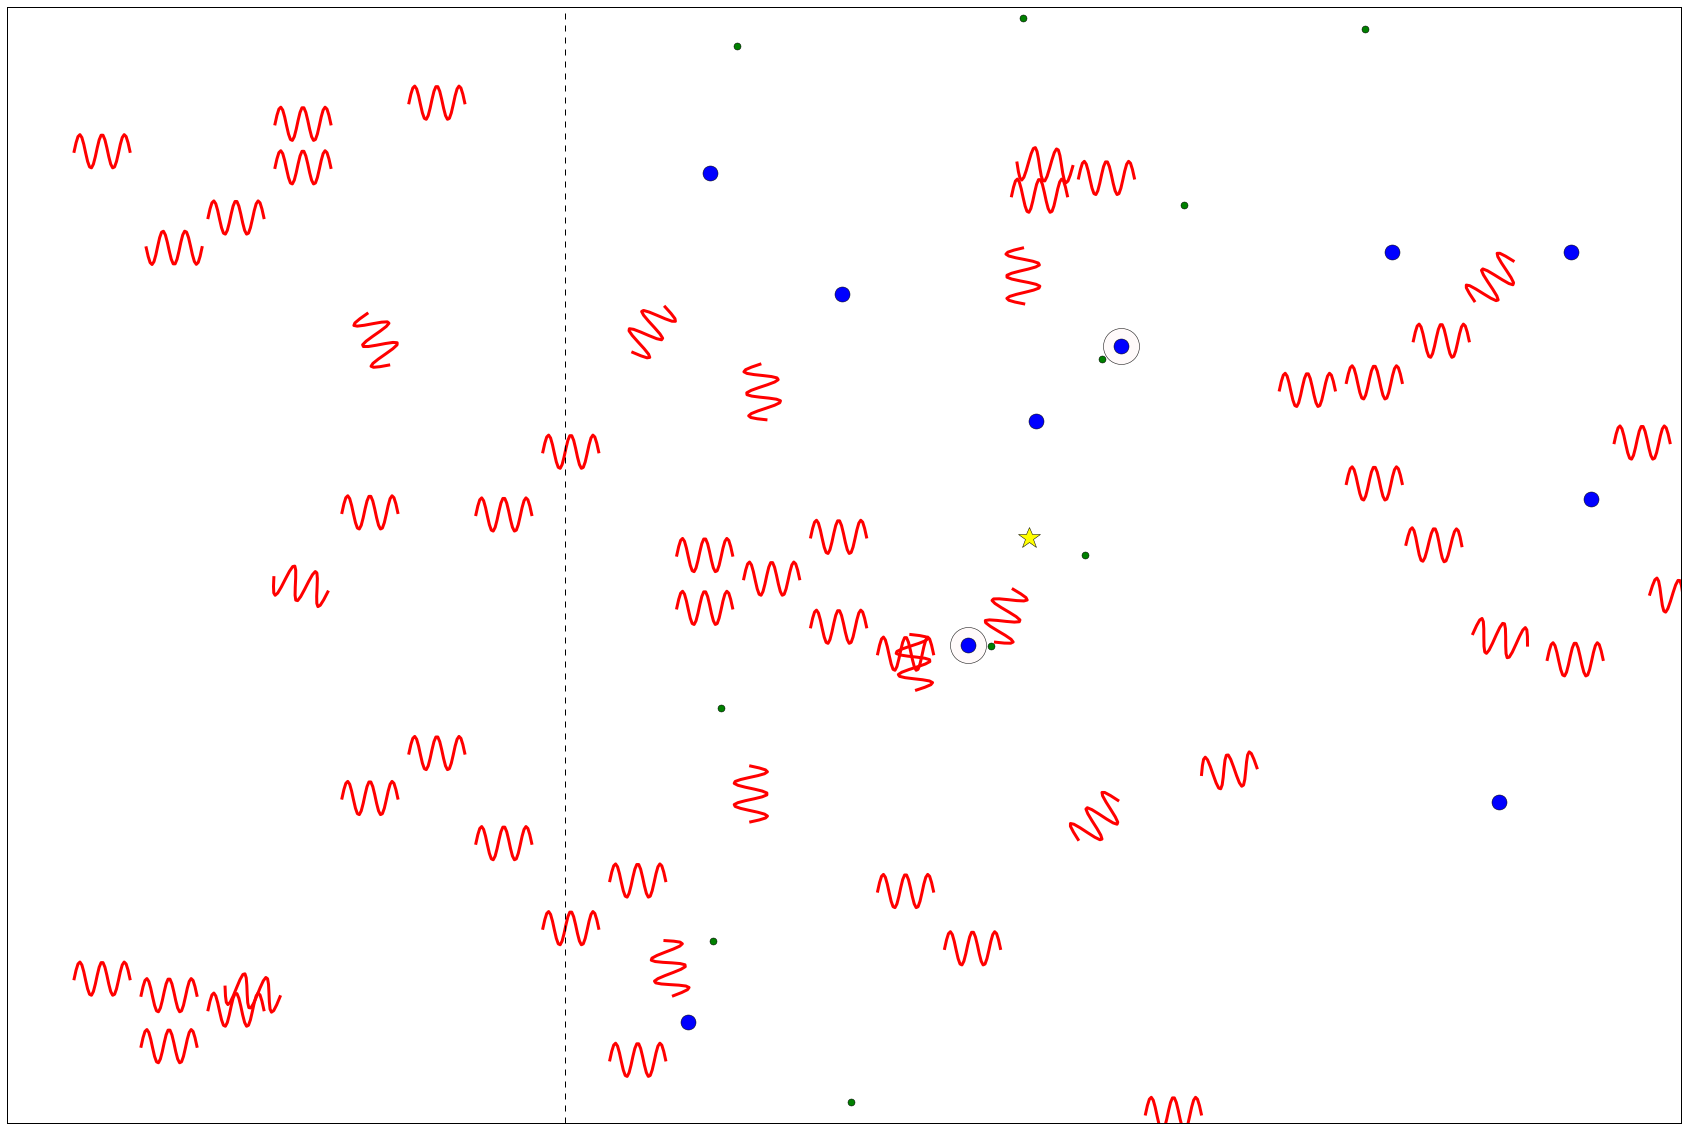

In [3]:
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
import mayavi.mlab as mlab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###Video params
fps=20.
t_tot=10    ##time in secondes

nbt = t_tot * fps
dt = 1.

###Box size

box_x = 100
box_y = 100
box_x_sup = 50

###factor to draw photons
fact = 1.5
tab_sin = fact*np.sin(np.linspace(0,5*np.pi,30))
tab_support = np.linspace(0,5,30)

###Part to define the initial conditions for the particles

Min_v_e = 1
Min_v_p = 0.3
Min_v_ph = 3

fact_v_e = 2
fact_v_p = 1.5
#fact_v_ph = 4

nb_part = 10    ###@number of protons and electrons
nb_photons = 1000
nb_ps = 2  ###Number photons created per shot
Delta_t_shot = .1 ###time between each shot
arr_ind = np.arange(nb_part+nb_photons)

##protons
p_x = np.random.rand(nb_part) * box_x
p_y = np.random.rand(nb_part) * box_y

p_thetha = np.random.rand(nb_part) * 2*np.pi
p_v = np.random.rand(nb_part) * fact_v_p  + Min_v_p

##electrons
e_x = np.random.rand(nb_part) * box_x
e_y = np.random.rand(nb_part) * box_y

e_thetha = np.random.rand(nb_part) * 2*np.pi
e_v = np.random.rand(nb_part) * fact_v_e  + Min_v_e

##photons (can be nb_part photons more at the maximum)
ph_x = np.zeros(nb_photons+nb_part) - box_x_sup   ###All photons will be generate from left side of the box
ph_y = np.random.rand(nb_photons+nb_part) * box_y

ph_thetha = np.zeros(nb_photons+nb_part)   ###All photons start to move to the right
ph_v = np.zeros(nb_photons+nb_part) + Min_v_ph

ph_exist = np.zeros(nb_photons+nb_part,int)+1   ###A photon still exist
ph_exist[nb_ps:]=0

ph_appear = np.zeros(nb_photons+nb_part)  ###Array to draw a star at the apparition place for Nframes
ph_x_appear = np.zeros(nb_photons+nb_part)
ph_y_appear = np.zeros(nb_photons+nb_part)
Nframes = 10

###Interction parameter

e_with = np.zeros(nb_part, int)-1  ##Array to know with which proton is associated the electron
p_with = np.zeros(nb_part, int)-1  ##Array to know with which electron is associated the proton
e_phi = np.random.rand(nb_part)*2*np.pi


cross_pe = 3.  ###define the distance to interact
cross_pp = 3.
cross_ee = 3.
cross_phe = 5




fig_mpl, ax = plt.subplots(1,figsize=(30,20), facecolor='white')

ax.plot(p_x, p_y, marker=u'o', color='blue', markersize=15, linestyle='None')  ####protons
ax.plot(e_x, e_y, marker=u'o', color='green', markersize=5, linestyle='None')  ####electrons
ax.plot([0, 0], [0,box_y], '--', color='black')
ax.set_xlim( (-box_x_sup, box_x) )
ax.set_ylim( (0, box_y) )


cpt = Delta_t_shot
nb_ph_generates = nb_ps

def make_frame_mpl(t):
    global p_x, p_y, p_thetha, p_v,  e_x, e_y, e_thetha, e_v, ph_x, ph_y, ph_thetha, ph_v, cpt, nb_ph_generates
    #mlab.clf() # clear the figure (to reset the colors)
    ax.clear()
    #ax.axis('off')
    
    #print 't=',t
    
    if (t > cpt) and (nb_ph_generates + nb_ps < nb_photons) :
        cpt = cpt + Delta_t_shot
        ph_exist[nb_ph_generates : nb_ph_generates + nb_ps] = 1
        nb_ph_generates = nb_ph_generates + nb_ps
    
    p_x = p_x + dt * p_v*np.cos(p_thetha)
    p_y = p_y + dt * p_v*np.sin(p_thetha)
    
    tmp_n = np.where(e_with < 0)
    e_x[tmp_n] = e_x[tmp_n] + dt * e_v[tmp_n]*np.cos(e_thetha[tmp_n])
    e_y[tmp_n] = e_y[tmp_n] + dt * e_v[tmp_n]*np.sin(e_thetha[tmp_n])
    
    tmp_y = np.where(e_with >= 0)
    e_x[tmp_y] = p_x[e_with[tmp_y]] + 2*np.cos(2*t+e_phi[tmp_y])
    e_y[tmp_y] = p_y[e_with[tmp_y]]+ 2*np.sin(2*t+e_phi[tmp_y])
    
    ##Photons
    tmp_exist = np.where(ph_exist == 1)  ###We move only the existing ones
    ph_x[tmp_exist] = ph_x[tmp_exist] + dt * ph_v[tmp_exist]*np.cos(ph_thetha[tmp_exist])
    ph_y[tmp_exist] = ph_y[tmp_exist] + dt * ph_v[tmp_exist]*np.sin(ph_thetha[tmp_exist])
    
    tmp = np.where( (p_x > box_x) | (p_x < 0) )
    p_x[tmp] = p_x[tmp] - 2* dt * p_v[tmp]*np.cos(p_thetha[tmp])
    p_thetha[tmp] = np.pi-p_thetha[tmp]
    tmp = np.where( (p_y > box_y) | (p_y < 0) )
    p_y[tmp] = p_y[tmp] -2* dt * p_v[tmp]*np.sin(p_thetha[tmp])
    p_thetha[tmp] = 2*np.pi-p_thetha[tmp]
    
    
    tmp = np.where( (e_x > box_x) | (e_x < 0) )
    e_x[tmp] = e_x[tmp] - 2* dt * e_v[tmp]*np.cos(e_thetha[tmp])
    e_thetha[tmp] = np.pi-e_thetha[tmp]
    tmp = np.where( (e_y > box_y) | (e_y < 0) )
    e_y[tmp] = e_y[tmp] -2* dt * e_v[tmp]*np.sin(e_thetha[tmp])
    e_thetha[tmp] = 2*np.pi-e_thetha[tmp]
    
    tmp = np.where( (ph_x > box_x) | (ph_x < -box_x_sup) )
    ph_exist[tmp] = 0
    #ph_x[tmp] = ph_x[tmp] - 2* dt * ph_v[tmp]*np.cos(ph_thetha[tmp])
    #ph_thetha[tmp] = np.pi-ph_thetha[tmp]
    tmp = np.where( (ph_y > box_y) | (ph_y < 0) )
    ph_exist[tmp] = 0
    #ph_y[tmp] = ph_y[tmp] -2* dt * ph_v[tmp]*np.sin(ph_thetha[tmp])
    #ph_thetha[tmp] = 2*np.pi-ph_thetha[tmp]
    
    ###Part to search interacting electrons with free protons
 
    for i in range(nb_part):
        tmp_pn = np.where( p_with < 0 )    ###select only free protons
        if len(p_with[tmp_pn]) > 0 :       ###Continue only if there are free protons
            if e_with[i] < 0:
                tab_dist_pe = np.sqrt( np.power(p_x[tmp_pn] - e_x[i],2) + np.power(p_y[tmp_pn] - e_y[i],2) )
                if tab_dist_pe.min() < cross_pe: 
                    ind_min = int(np.argmin(tab_dist_pe))
                    tab = arr_ind[tmp_pn]
                    e_with[i] = tab[ind_min]
                    p_with[e_with[i]] = i
                    ##creation of a photon
                    tmp_phex = np.where(ph_exist == 0)
                    ind_min = int(np.argmin(tmp_phex))
                    tab = arr_ind[tmp_phex]
                    ind_min = tab[ind_min]
                    ph_exist[ind_min] = 1
                    ph_x[ind_min] = e_x[i] + 5.*(box_x/2. - e_x[i])/np.sqrt((box_x/2. - e_x[i])**2)
                    ph_y[ind_min] = e_y[i] + 5.*(box_y/2. - e_y[i])/np.sqrt((box_y/2. - e_y[i])**2)
                    ph_x_appear[ind_min] = ph_x[ind_min]
                    ph_y_appear[ind_min] = ph_y[ind_min]
                    ph_appear[ind_min] = Nframes
                    

                
    ###Part to search the interaction photon-electron and photon-proton
    for i in range(nb_photons+nb_part):
        tmp_en = np.where( e_with < 0 )    ###select only free electrons
        if len(e_with[tmp_en]) > 0 :       ###Continue only if there are free protons
            if ph_exist[i] == 1:
                tab_dist_phe = np.sqrt( np.power(e_x[tmp_en] - ph_x[i],2) + np.power(e_y[tmp_en] - ph_y[i],2) )
                if tab_dist_phe.min() < cross_phe:
                    delta_l = np.random.rand(1)*2
                    dtheta = np.arccos(1-delta_l)
                    ph_thetha[i] = ph_thetha[i] + dtheta
                    
    ###Part to search the interaction photon - electron in atom
    for i in range(nb_photons+nb_part):
        tmp_en = np.where( e_with > 0 )    ###select only linked electrons
        if len(e_with[tmp_en]) > 0 :       ###Continue only if there are linked electrons
            if ph_exist[i] == 1:
                tab_dist_phe = np.sqrt( np.power(e_x[tmp_en] - ph_x[i],2) + np.power(e_y[tmp_en] - ph_y[i],2) )
                if tab_dist_phe.min() < cross_phe:
                    ind_min = int(np.argmin(tab_dist_phe))
                    tab = arr_ind[tmp_en]
                    p_with[e_with[tab[ind_min]]] = -1
                    e_with[tab[ind_min]] = -1  ###Not linked anymore
                    ph_exist[i] = 0
                    e_x[tab[ind_min]] = e_x[tab[ind_min]] + 5.*(box_x/2. - e_x[tab[ind_min]])/np.sqrt((box_x/2. - e_x[tab[ind_min]])**2)
                    e_y[tab[ind_min]] = e_y[tab[ind_min]] + 5.*(box_y/2. - e_y[tab[ind_min]])/np.sqrt((box_y/2. - e_y[tab[ind_min]])**2)


                    
    
    ####Part to draw the particles
    ax.plot(p_x[e_with[tmp_y]], p_y[e_with[tmp_y]], marker=u'o', color='snow', markersize=36, linestyle='None')
    ax.plot(p_x, p_y, marker=u'o', color='blue', markersize=15, linestyle='None')  ####protons
    ax.plot(e_x, e_y, marker=u'o', color='green', markersize=7, linestyle='None')  ####electrons
    
    for i in range(nb_photons+nb_part):
        if ph_appear[i] > 0:
            ax.plot(ph_x_appear[i], ph_y_appear[i], marker =u'*', color='yellow', markersize = 20+ph_appear[i] )
            ph_appear[i] = ph_appear[i] - 1
    
    for i in range(nb_photons+nb_part):
        if ph_exist[i] == 1:
            x_draw = np.cos(ph_thetha[i])*tab_support - np.sin(ph_thetha[i])*tab_sin
            y_draw = np.sin(ph_thetha[i])*tab_support + np.cos(ph_thetha[i])*tab_sin
            ax.plot(x_draw+ph_x[i], y_draw+ph_y[i], color='red', linewidth=3)
            
        
    ax.plot([0, 0], [0,box_y], '--', color='black')
    ax.set_xlim( (-box_x_sup, box_x) )
    ax.set_ylim( (0, box_y) )
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=nbt/fps)
animation.write_gif("Strait_Photons_Protons_Electrons_Interact_bar.gif", fps=fps)


[MoviePy] Building file Strait_Photons_Protons_Electrons_Interact_bar.gif with imageio


100%|█████████▉| 600/601 [04:03<00:00,  2.45it/s]


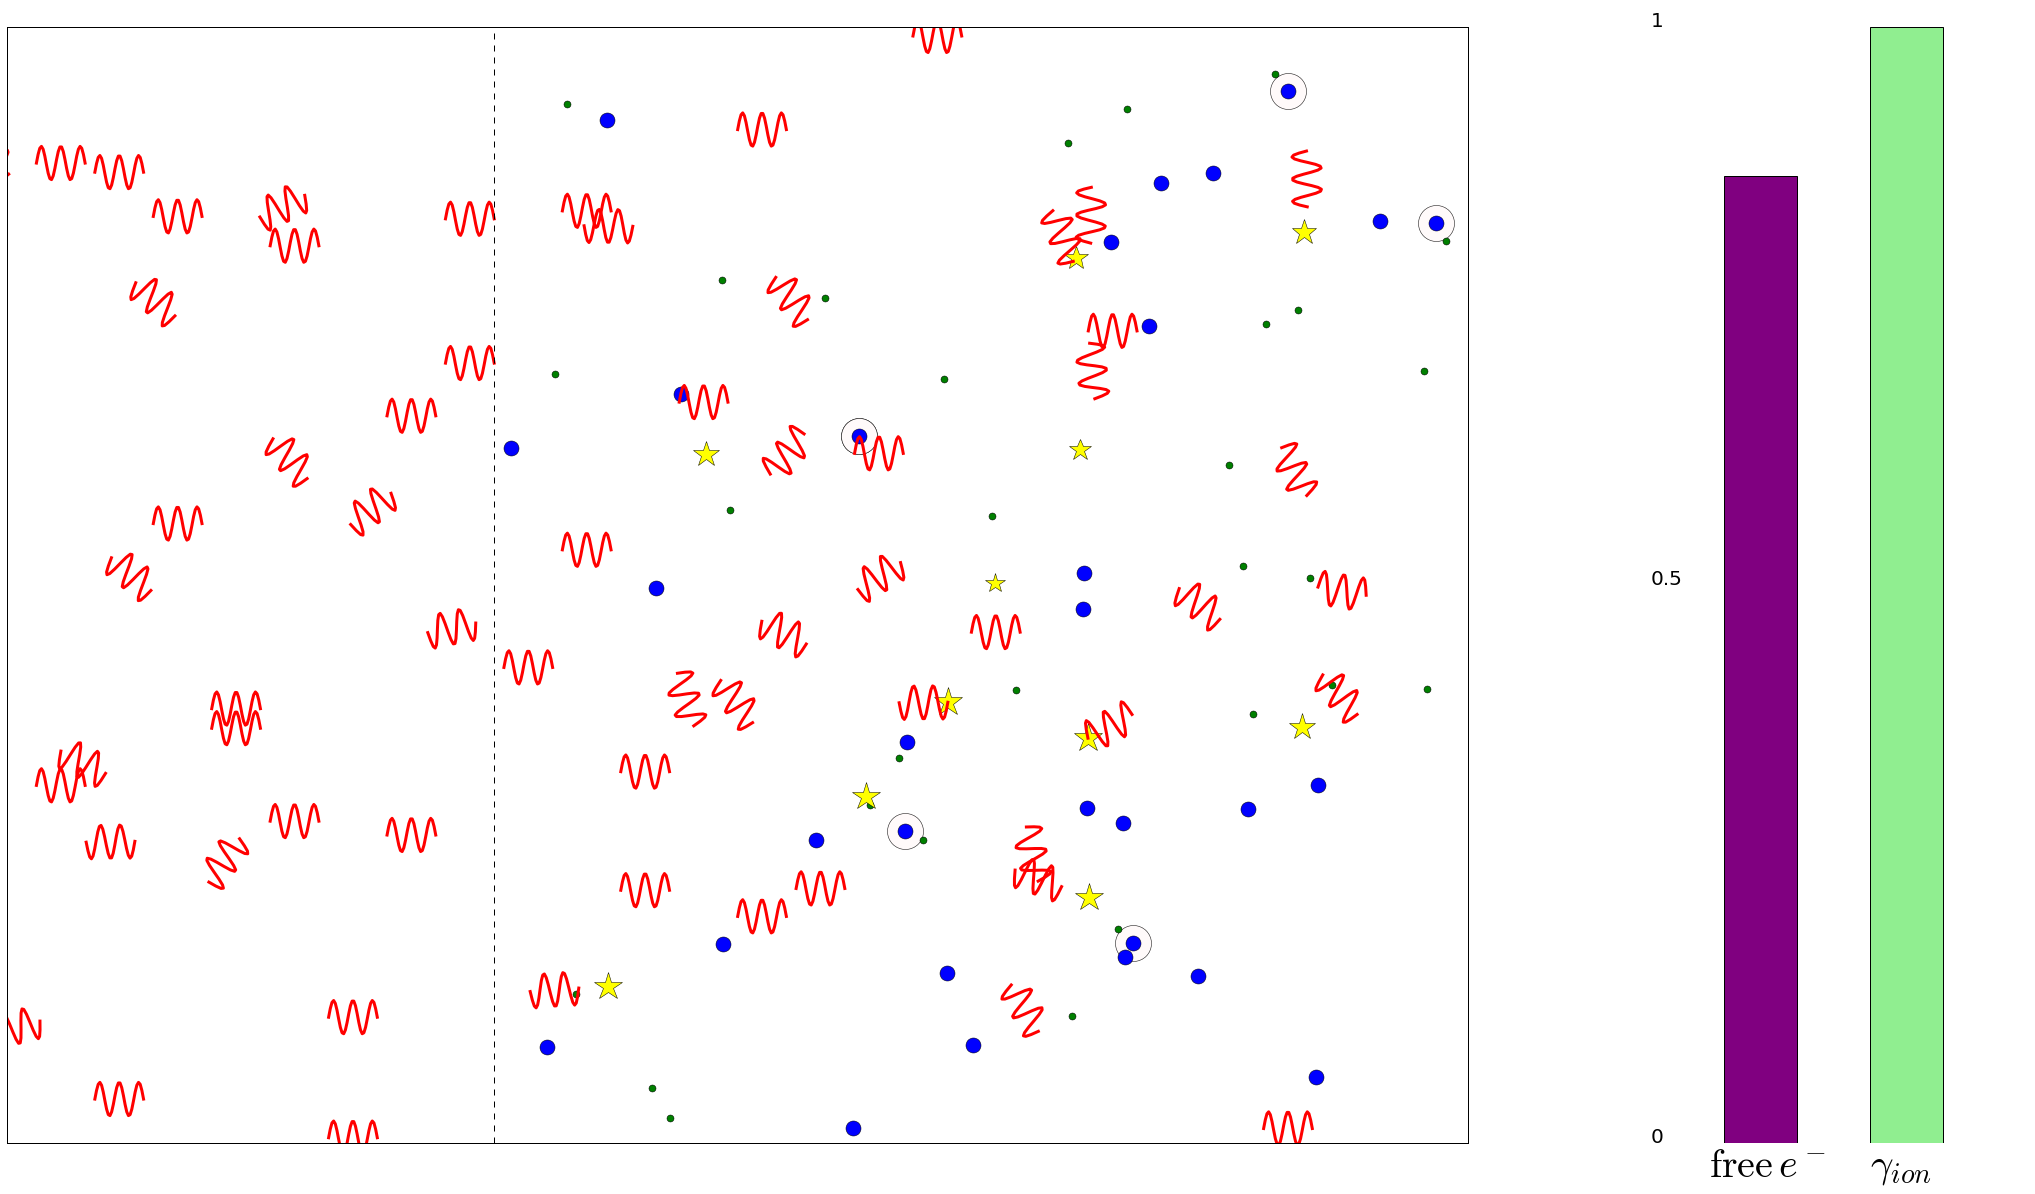

In [30]:
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
import mayavi.mlab as mlab
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

###Video params
fps=20.
t_tot=30.    ##time in secondes

nbt = t_tot * fps
dt = 1.

###Box size

box_x = 100
box_y = 100
box_x_sup = 50

###factor to draw photons
fact = 1.5
tab_sin = fact*np.sin(np.linspace(0,5*np.pi,30))
tab_support = np.linspace(0,5,30)

###Part to define the initial conditions for the particles

Min_v_e = 1
Min_v_p = 0.3
Min_v_ph = 3

fact_v_e = 2
fact_v_p = 1.5
#fact_v_ph = 4

nb_part = 30    ###@number of protons and electrons
nb_photons = 10000
nb_ps = 2  ###Number photons created per shot
Delta_t_shot = .1 ###time between each shot
arr_ind = np.arange(nb_part+nb_photons)

##protons
p_x = np.random.rand(nb_part) * box_x
p_y = np.random.rand(nb_part) * box_y

p_thetha = np.random.rand(nb_part) * 2*np.pi
p_v = np.random.rand(nb_part) * fact_v_p  + Min_v_p

##electrons
e_x = np.random.rand(nb_part) * box_x
e_y = np.random.rand(nb_part) * box_y

e_thetha = np.random.rand(nb_part) * 2*np.pi
e_v = np.random.rand(nb_part) * fact_v_e  + Min_v_e

##photons (can be nb_part photons more at the maximum)
ph_x = np.zeros(nb_photons+nb_part) - box_x_sup   ###All photons will be generate from left side of the box
ph_y = np.random.rand(nb_photons+nb_part) * box_y

ph_thetha = np.zeros(nb_photons+nb_part)   ###All photons start to move to the right
ph_v = np.zeros(nb_photons+nb_part) + Min_v_ph

ph_exist = np.zeros(nb_photons+nb_part,int)+1   ###A photon still exist
ph_exist[nb_ps:]=0

ph_appear = np.zeros(nb_photons+nb_part)  ###Array to draw a star at the apparition place for Nframes
ph_x_appear = np.zeros(nb_photons+nb_part)
ph_y_appear = np.zeros(nb_photons+nb_part)
Nframes = 10

###Interction parameter

e_with = np.zeros(nb_part, int)-1  ##Array to know with which proton is associated the electron
p_with = np.zeros(nb_part, int)-1  ##Array to know with which electron is associated the proton
e_phi = np.random.rand(nb_part)*2*np.pi


cross_pe = 3.  ###define the distance to interact
cross_pp = 3.
cross_ee = 3.
cross_phe = 5




fig_mpl= plt.figure(figsize=(36,20), facecolor='white')
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
#ax.layout(xaxis=dict(domain=[0., 0.8]),xaxis2=dict(domain=[0., 0.8]) )
ax = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax.plot(p_x, p_y, marker=u'o', color='blue', markersize=15, linestyle='None')  ####protons
ax.plot(e_x, e_y, marker=u'o', color='green', markersize=5, linestyle='None')  ####electrons
ax.plot([0, 0], [0,box_y], '--', color='black')
ax.set_xlim( (-box_x_sup, box_x) )
ax.set_ylim( (0, box_y) )


cpt = Delta_t_shot
nb_ph_generates = nb_ps

def make_frame_mpl(t):
    global p_x, p_y, p_thetha, p_v,  e_x, e_y, e_thetha, e_v, ph_x, ph_y, ph_thetha, ph_v, cpt, nb_ph_generates
    #mlab.clf() # clear the figure (to reset the colors)
    ax.clear()
    ax2.clear()
    #ax.axis('off')
    
    #print 't=',t
    
    if (t > cpt) and (nb_ph_generates + nb_ps < nb_photons) :
        cpt = cpt + Delta_t_shot
        ph_exist[nb_ph_generates : nb_ph_generates + nb_ps] = 1
        nb_ph_generates = nb_ph_generates + nb_ps
    
    p_x = p_x + dt * p_v*np.cos(p_thetha)
    p_y = p_y + dt * p_v*np.sin(p_thetha)
    
    tmp_n = np.where(e_with < 0)
    e_x[tmp_n] = e_x[tmp_n] + dt * e_v[tmp_n]*np.cos(e_thetha[tmp_n])
    e_y[tmp_n] = e_y[tmp_n] + dt * e_v[tmp_n]*np.sin(e_thetha[tmp_n])
    
    tmp_y = np.where(e_with >= 0)
    e_x[tmp_y] = p_x[e_with[tmp_y]] + 2*np.cos(2*t+e_phi[tmp_y])
    e_y[tmp_y] = p_y[e_with[tmp_y]]+ 2*np.sin(2*t+e_phi[tmp_y])
    
    ##Photons
    tmp_exist = np.where(ph_exist == 1)  ###We move only the existing ones
    ph_x[tmp_exist] = ph_x[tmp_exist] + dt * ph_v[tmp_exist]*np.cos(ph_thetha[tmp_exist])
    ph_y[tmp_exist] = ph_y[tmp_exist] + dt * ph_v[tmp_exist]*np.sin(ph_thetha[tmp_exist])
    
    tmp = np.where( (p_x > box_x) | (p_x < 0) )
    p_x[tmp] = p_x[tmp] - 2* dt * p_v[tmp]*np.cos(p_thetha[tmp])
    p_thetha[tmp] = np.pi-p_thetha[tmp]
    tmp = np.where( (p_y > box_y) | (p_y < 0) )
    p_y[tmp] = p_y[tmp] -2* dt * p_v[tmp]*np.sin(p_thetha[tmp])
    p_thetha[tmp] = 2*np.pi-p_thetha[tmp]
    
    
    tmp = np.where( (e_x > box_x) | (e_x < 0) )
    e_x[tmp] = e_x[tmp] - 2* dt * e_v[tmp]*np.cos(e_thetha[tmp])
    e_thetha[tmp] = np.pi-e_thetha[tmp]
    tmp = np.where( (e_y > box_y) | (e_y < 0) )
    e_y[tmp] = e_y[tmp] -2* dt * e_v[tmp]*np.sin(e_thetha[tmp])
    e_thetha[tmp] = 2*np.pi-e_thetha[tmp]
    
    tmp = np.where( (ph_x > box_x) | (ph_x < -box_x_sup) )
    ph_exist[tmp] = 0
    #ph_x[tmp] = ph_x[tmp] - 2* dt * ph_v[tmp]*np.cos(ph_thetha[tmp])
    #ph_thetha[tmp] = np.pi-ph_thetha[tmp]
    tmp = np.where( (ph_y > box_y) | (ph_y < 0) )
    ph_exist[tmp] = 0
    #ph_y[tmp] = ph_y[tmp] -2* dt * ph_v[tmp]*np.sin(ph_thetha[tmp])
    #ph_thetha[tmp] = 2*np.pi-ph_thetha[tmp]
    
    ###Part to search interacting electrons with free protons
 
    for i in range(nb_part):
        tmp_pn = np.where( p_with < 0 )    ###select only free protons
        if len(p_with[tmp_pn]) > 0 :       ###Continue only if there are free protons
            if e_with[i] < 0:
                tab_dist_pe = np.sqrt( np.power(p_x[tmp_pn] - e_x[i],2) + np.power(p_y[tmp_pn] - e_y[i],2) )
                if tab_dist_pe.min() < cross_pe: 
                    ind_min = int(np.argmin(tab_dist_pe))
                    tab = arr_ind[tmp_pn]
                    e_with[i] = tab[ind_min]
                    p_with[e_with[i]] = i
                    ##creation of a photon
                    tmp_phex = np.where(ph_exist == 0)
                    ind_min = int(np.argmin(tmp_phex))
                    tab = arr_ind[tmp_phex]
                    ind_min = tab[ind_min]
                    ph_exist[ind_min] = 1
                    ph_x[ind_min] = e_x[i] + 5.*(box_x/2. - e_x[i])/np.sqrt((box_x/2. - e_x[i])**2)
                    ph_y[ind_min] = e_y[i] + 5.*(box_y/2. - e_y[i])/np.sqrt((box_y/2. - e_y[i])**2)
                    ph_x_appear[ind_min] = ph_x[ind_min]
                    ph_y_appear[ind_min] = ph_y[ind_min]
                    ph_appear[ind_min] = Nframes
                    

                
    ###Part to search the interaction photon-electron and photon-proton
    for i in range(nb_photons+nb_part):
        tmp_en = np.where( e_with < 0 )    ###select only free electrons
        if len(e_with[tmp_en]) > 0 :       ###Continue only if there are free protons
            if ph_exist[i] == 1:
                tab_dist_phe = np.sqrt( np.power(e_x[tmp_en] - ph_x[i],2) + np.power(e_y[tmp_en] - ph_y[i],2) )
                if tab_dist_phe.min() < cross_phe:
                    delta_l = np.random.rand(1)*2
                    dtheta = np.arccos(1-delta_l)
                    ph_thetha[i] = ph_thetha[i] + dtheta
                    
    ###Part to search the interaction photon - electron in atom
    for i in range(nb_photons+nb_part):
        tmp_en = np.where( e_with > 0 )    ###select only linked electrons
        assoc_elec = len(e_with[tmp_en])
        if len(e_with[tmp_en]) > 0 :       ###Continue only if there are linked electrons
            if ph_exist[i] == 1:
                tab_dist_phe = np.sqrt( np.power(e_x[tmp_en] - ph_x[i],2) + np.power(e_y[tmp_en] - ph_y[i],2) )
                if tab_dist_phe.min() < cross_phe:
                    ind_min = int(np.argmin(tab_dist_phe))
                    tab = arr_ind[tmp_en]
                    p_with[e_with[tab[ind_min]]] = -1
                    e_with[tab[ind_min]] = -1  ###Not linked anymore
                    ph_exist[i] = 0
                    e_x[tab[ind_min]] = e_x[tab[ind_min]] + 5.*(box_x/2. - e_x[tab[ind_min]])/np.sqrt((box_x/2. - e_x[tab[ind_min]])**2)
                    e_y[tab[ind_min]] = e_y[tab[ind_min]] + 5.*(box_y/2. - e_y[tab[ind_min]])/np.sqrt((box_y/2. - e_y[tab[ind_min]])**2)


                    
    
    ####Part to draw the particles
    ax.plot(p_x[e_with[tmp_y]], p_y[e_with[tmp_y]], marker=u'o', color='snow', markersize=36, linestyle='None')
    ax.plot(p_x, p_y, marker=u'o', color='blue', markersize=15, linestyle='None')  ####protons
    ax.plot(e_x, e_y, marker=u'o', color='green', markersize=7, linestyle='None')  ####electrons
    
    for i in range(nb_photons+nb_part):
        if ph_appear[i] > 0:
            ax.plot(ph_x_appear[i], ph_y_appear[i], marker =u'*', color='yellow', markersize = 20+ph_appear[i] )
            ph_appear[i] = ph_appear[i] - 1
    
    for i in range(nb_photons+nb_part):
        if ph_exist[i] == 1:
            x_draw = np.cos(ph_thetha[i])*tab_support - np.sin(ph_thetha[i])*tab_sin
            y_draw = np.sin(ph_thetha[i])*tab_support + np.cos(ph_thetha[i])*tab_sin
            ax.plot(x_draw+ph_x[i], y_draw+ph_y[i], color='red', linewidth=3)
            
        
    ax.plot([0, 0], [0,box_y], '--', color='black')
    ax.set_xlim( (-box_x_sup, box_x) )
    ax.set_ylim( (0, box_y) )
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    ratio_free_elec = 1.-assoc_elec*1./nb_part
    ratio_ion_phot = 1.
    ax2.bar(1, ratio_free_elec, 1,color='purple')
    ax2.bar(3, ratio_ion_phot, 1,color='lightgreen')
    ax2.set_ylim(0,1)
    ax2.set_xlim(0,5)
    #ax2.set_xticklabels(['free $e^-$', '$\gamma_{ion}$'])
    #ax2.set_xticks([1.5,3.5])
    ax2.tick_params(axis='both', which='major', labelsize=40)
    ax2.set_axis_off()
    ax2.text(0.8, -0.03 , '$\mathrm{free}\, e^-$', fontsize=40)
    ax2.text(3., -0.03 , '$\gamma_{ion}$', fontsize=40)
    ax2.text(0,0,'0', fontsize=20)
    ax2.text(0,0.5,'0.5', fontsize=20)
    ax2.text(0,1.,'1', fontsize=20)
    
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=nbt/fps)
animation.write_gif("Strait_Photons_Protons_Electrons_Interact_bar.gif", fps=fps)

# FOG with photon NO energy variation.

0 0

[MoviePy] Building file Strait_Photons_Protons_Electrons_Interact_bar_evol_15.gif with imageio



  0%|          | 0/601 [00:00<?, ?it/s]

0 0



  0%|          | 2/601 [00:00<03:37,  2.75it/s]

0 0


0 0



  0%|          | 3/601 [00:01<03:42,  2.69it/s]

0 0



  1%|          | 4/601 [00:01<03:35,  2.77it/s]

0 1



  1%|          | 5/601 [00:02<04:36,  2.16it/s]

0 1



  1%|          | 6/601 [00:02<04:33,  2.18it/s]

0 1



  1%|          | 7/601 [00:02<04:13,  2.34it/s]

0 1



  1%|▏         | 8/601 [00:03<04:12,  2.35it/s]

0 1



  1%|▏         | 9/601 [00:03<04:35,  2.15it/s]

0 1



  2%|▏         | 10/601 [00:04<04:13,  2.33it/s]

0 1



  2%|▏         | 11/601 [00:04<04:10,  2.35it/s]

0 1



  2%|▏         | 12/601 [00:05<04:35,  2.14it/s]

0 1



  2%|▏         | 13/601 [00:05<04:13,  2.32it/s]

0 1



  2%|▏         | 14/601 [00:06<04:47,  2.04it/s]

0 1



  2%|▏         | 15/601 [00:06<04:24,  2.22it/s]

0 1



  3%|▎         | 17/601 [00:07<04:39,  2.09it/s]

0 1


0 1



  3%|▎         | 19/601 [00:08<04:51,  2.00it/s]

0 1


0 1



  3%|▎         | 20/601 [00:09<04:54,  1.98it/s]

0 1



  3%|▎         | 21/601 [00:09<04:28,  2.16it/s]

1 1



  4%|▎         | 22/601 [00:09<04:11,  2.30it/s]

1 1



  4%|▍         | 23/601 [00:10<04:03,  2.37it/s]

1 1



  4%|▍         | 24/601 [00:10<04:06,  2.34it/s]

1 1



  4%|▍         | 25/601 [00:11<04:32,  2.12it/s]

1 1



  4%|▍         | 26/601 [00:11<04:17,  2.24it/s]

1 1



  4%|▍         | 27/601 [00:12<04:38,  2.06it/s]

1 1



  5%|▍         | 28/601 [00:12<04:36,  2.07it/s]

1 1



  5%|▍         | 29/601 [00:13<05:07,  1.86it/s]

1 1



  5%|▍         | 30/601 [00:13<04:40,  2.03it/s]

1 2



  5%|▌         | 31/601 [00:14<04:15,  2.23it/s]

1 2



  5%|▌         | 32/601 [00:14<04:33,  2.08it/s]

1 2



  5%|▌         | 33/601 [00:15<04:20,  2.18it/s]

1 2



  6%|▌         | 34/601 [00:15<04:01,  2.35it/s]

1 2



  6%|▌         | 35/601 [00:16<04:07,  2.28it/s]

1 5



  6%|▌         | 36/601 [00:16<04:12,  2.23it/s]

1 5



  6%|▌         | 37/601 [00:17<04:38,  2.02it/s]

1 5



  6%|▋         | 38/601 [00:17<04:20,  2.16it/s]

1 5



  7%|▋         | 40/601 [00:18<04:01,  2.32it/s]

1 5


1 5



  7%|▋         | 41/601 [00:18<04:01,  2.32it/s]

1 5



  7%|▋         | 42/601 [00:19<04:07,  2.26it/s]

1 6



  7%|▋         | 43/601 [00:19<04:25,  2.10it/s]

1 6



  7%|▋         | 44/601 [00:20<04:06,  2.26it/s]

1 6



  7%|▋         | 45/601 [00:20<04:24,  2.10it/s]

1 6



  8%|▊         | 46/601 [00:21<04:20,  2.13it/s]

1 6



  8%|▊         | 47/601 [00:21<04:49,  1.91it/s]

1 6



  8%|▊         | 48/601 [00:22<04:40,  1.97it/s]

0 7



  8%|▊         | 49/601 [00:22<04:17,  2.14it/s]

1 9



  8%|▊         | 50/601 [00:22<04:00,  2.29it/s]

1 9



  8%|▊         | 51/601 [00:23<03:48,  2.41it/s]

1 9



  9%|▊         | 52/601 [00:23<03:40,  2.49it/s]

1 12



  9%|▉         | 54/601 [00:24<03:32,  2.58it/s]

1 12


1 13



  9%|▉         | 55/601 [00:25<03:54,  2.32it/s]

2 13



  9%|▉         | 56/601 [00:25<04:16,  2.13it/s]

2 13



  9%|▉         | 57/601 [00:25<03:59,  2.27it/s]

2 13



 10%|▉         | 58/601 [00:26<04:31,  2.00it/s]

2 13



 10%|▉         | 59/601 [00:27<04:39,  1.94it/s]

2 13



 10%|▉         | 60/601 [00:27<04:45,  1.90it/s]

2 13



 10%|█         | 61/601 [00:28<04:32,  1.98it/s]

2 13



 10%|█         | 62/601 [00:28<04:57,  1.81it/s]

2 14



 10%|█         | 63/601 [00:29<04:29,  2.00it/s]

2 15



 11%|█         | 64/601 [00:29<04:18,  2.07it/s]

2 15



 11%|█         | 65/601 [00:30<04:20,  2.06it/s]

2 17



 11%|█         | 66/601 [00:30<04:01,  2.22it/s]

3 17



 11%|█         | 67/601 [00:30<03:47,  2.34it/s]

3 17



 11%|█▏        | 68/601 [00:31<04:08,  2.14it/s]

4 17



 11%|█▏        | 69/601 [00:31<04:19,  2.05it/s]

4 18



 12%|█▏        | 70/601 [00:32<04:46,  1.85it/s]

4 18



 12%|█▏        | 71/601 [00:33<04:30,  1.96it/s]

3 20



 12%|█▏        | 72/601 [00:33<04:10,  2.11it/s]

4 20



 12%|█▏        | 73/601 [00:33<04:08,  2.13it/s]

4 22



 12%|█▏        | 74/601 [00:34<04:14,  2.07it/s]

5 22



 12%|█▏        | 75/601 [00:34<04:23,  2.00it/s]

5 23



 13%|█▎        | 76/601 [00:35<04:12,  2.08it/s]

5 23



 13%|█▎        | 77/601 [00:36<04:51,  1.80it/s]

5 23



 13%|█▎        | 78/601 [00:36<04:26,  1.96it/s]

5 25



 13%|█▎        | 79/601 [00:37<04:32,  1.91it/s]

5 26



 13%|█▎        | 80/601 [00:37<04:13,  2.06it/s]

5 28



 14%|█▎        | 82/601 [00:38<04:07,  2.10it/s]

6 28


6 29



 14%|█▍        | 83/601 [00:38<03:53,  2.21it/s]

6 31



 14%|█▍        | 84/601 [00:39<04:03,  2.12it/s]

6 31



 14%|█▍        | 85/601 [00:39<03:49,  2.25it/s]

6 31



 14%|█▍        | 86/601 [00:40<03:38,  2.35it/s]

6 31



 14%|█▍        | 87/601 [00:40<04:01,  2.13it/s]

7 31



 15%|█▍        | 88/601 [00:41<03:58,  2.15it/s]

7 31



 15%|█▍        | 89/601 [00:41<04:16,  1.99it/s]

8 31



 15%|█▍        | 90/601 [00:42<03:59,  2.13it/s]

7 32



 15%|█▌        | 91/601 [00:42<04:31,  1.88it/s]

7 33



 15%|█▌        | 92/601 [00:43<04:18,  1.97it/s]

7 34



 15%|█▌        | 93/601 [00:43<04:44,  1.78it/s]

8 35



 16%|█▌        | 94/601 [00:44<04:41,  1.80it/s]

8 35



 16%|█▌        | 95/601 [00:44<04:27,  1.90it/s]

8 35



 16%|█▌        | 96/601 [00:45<04:33,  1.85it/s]

8 38



 16%|█▌        | 97/601 [00:46<04:48,  1.75it/s]

9 40



 16%|█▋        | 98/601 [00:46<05:11,  1.61it/s]

9 41



 16%|█▋        | 99/601 [00:47<05:00,  1.67it/s]

10 43



 17%|█▋        | 100/601 [00:48<04:52,  1.71it/s]

10 43



 17%|█▋        | 101/601 [00:48<04:21,  1.91it/s]

10 43



 17%|█▋        | 102/601 [00:48<04:00,  2.07it/s]

10 43



 17%|█▋        | 103/601 [00:49<04:02,  2.05it/s]

11 43



 17%|█▋        | 104/601 [00:49<03:47,  2.19it/s]

11 45



 17%|█▋        | 105/601 [00:50<03:54,  2.11it/s]

13 45



 18%|█▊        | 106/601 [00:50<03:40,  2.24it/s]

13 46



 18%|█▊        | 108/601 [00:51<03:23,  2.42it/s]

13 47


13 47



 18%|█▊        | 109/601 [00:51<03:20,  2.45it/s]

13 47



 18%|█▊        | 110/601 [00:52<03:16,  2.50it/s]

13 47



 18%|█▊        | 111/601 [00:52<03:30,  2.33it/s]

14 47



 19%|█▊        | 112/601 [00:52<03:22,  2.42it/s]

14 47



 19%|█▉        | 113/601 [00:53<03:19,  2.44it/s]

15 49



 19%|█▉        | 114/601 [00:53<03:16,  2.48it/s]

15 49



 19%|█▉        | 115/601 [00:54<03:13,  2.51it/s]

15 50



 19%|█▉        | 116/601 [00:54<03:10,  2.54it/s]

15 50



 19%|█▉        | 117/601 [00:54<03:09,  2.56it/s]

15 51



 20%|█▉        | 118/601 [00:55<03:25,  2.35it/s]

15 52



 20%|█▉        | 119/601 [00:55<03:19,  2.42it/s]

15 52



 20%|█▉        | 120/601 [00:56<03:40,  2.18it/s]

15 53



 20%|██        | 121/601 [00:57<04:12,  1.90it/s]

15 53



 20%|██        | 122/601 [00:57<04:35,  1.74it/s]

15 54



 20%|██        | 123/601 [00:58<04:14,  1.88it/s]

15 54



 21%|██        | 124/601 [00:58<04:36,  1.72it/s]

15 57



 21%|██        | 125/601 [00:59<05:18,  1.50it/s]

15 59



 21%|██        | 126/601 [01:00<04:53,  1.62it/s]

15 60



 21%|██        | 127/601 [01:00<04:19,  1.83it/s]

15 60



 21%|██▏       | 128/601 [01:01<04:24,  1.79it/s]

15 62



 21%|██▏       | 129/601 [01:01<04:24,  1.78it/s]

16 63



 22%|██▏       | 130/601 [01:02<04:00,  1.96it/s]

16 65



 22%|██▏       | 131/601 [01:02<04:01,  1.95it/s]

16 66



 22%|██▏       | 132/601 [01:03<03:42,  2.10it/s]

16 68



 22%|██▏       | 133/601 [01:03<03:30,  2.22it/s]

18 68



 22%|██▏       | 134/601 [01:03<03:20,  2.33it/s]

18 69



 22%|██▏       | 135/601 [01:04<03:14,  2.39it/s]

18 70



 23%|██▎       | 136/601 [01:04<03:22,  2.30it/s]

18 72



 23%|██▎       | 137/601 [01:05<03:50,  2.01it/s]

19 73



 23%|██▎       | 138/601 [01:05<03:52,  1.99it/s]

19 76



 23%|██▎       | 139/601 [01:06<03:34,  2.15it/s]

19 76



 23%|██▎       | 140/601 [01:06<03:42,  2.07it/s]

19 76



 23%|██▎       | 141/601 [01:07<03:58,  1.93it/s]

19 77



 24%|██▎       | 142/601 [01:07<03:37,  2.11it/s]

19 78



 24%|██▍       | 143/601 [01:08<03:37,  2.10it/s]

19 78



 24%|██▍       | 144/601 [01:08<03:54,  1.95it/s]

19 79



 24%|██▍       | 146/601 [01:09<03:38,  2.08it/s]

19 79


19 80



 24%|██▍       | 147/601 [01:10<03:27,  2.19it/s]

19 81



 25%|██▍       | 148/601 [01:10<03:49,  1.98it/s]

19 83



 25%|██▍       | 149/601 [01:11<04:09,  1.82it/s]

19 86



 25%|██▍       | 150/601 [01:12<04:21,  1.73it/s]

19 86



 25%|██▌       | 151/601 [01:12<04:06,  1.83it/s]

19 86



 25%|██▌       | 152/601 [01:13<04:37,  1.62it/s]

19 88



 25%|██▌       | 153/601 [01:13<04:14,  1.76it/s]

19 88



 26%|██▌       | 154/601 [01:14<04:21,  1.71it/s]

19 90



 26%|██▌       | 155/601 [01:14<03:53,  1.91it/s]

19 91



 26%|██▌       | 156/601 [01:15<03:36,  2.06it/s]

20 92



 26%|██▌       | 157/601 [01:15<03:44,  1.98it/s]

20 92



 26%|██▋       | 158/601 [01:16<03:27,  2.13it/s]

20 93



 26%|██▋       | 159/601 [01:16<03:38,  2.02it/s]

20 94



 27%|██▋       | 160/601 [01:17<03:59,  1.84it/s]

21 95



 27%|██▋       | 161/601 [01:17<04:05,  1.79it/s]

21 95



 27%|██▋       | 162/601 [01:18<04:04,  1.80it/s]

21 97



 27%|██▋       | 163/601 [01:18<03:40,  1.99it/s]

21 98



 27%|██▋       | 165/601 [01:19<03:11,  2.28it/s]

21 99


21 100



 28%|██▊       | 166/601 [01:19<03:03,  2.37it/s]

21 100



 28%|██▊       | 167/601 [01:20<03:15,  2.22it/s]

21 101



 28%|██▊       | 168/601 [01:20<03:05,  2.33it/s]

21 102



 28%|██▊       | 169/601 [01:21<02:57,  2.43it/s]

21 103



 28%|██▊       | 170/601 [01:21<03:16,  2.19it/s]

21 104



 28%|██▊       | 171/601 [01:22<03:13,  2.22it/s]

21 105



 29%|██▉       | 173/601 [01:23<03:17,  2.17it/s]

21 107


21 107



 29%|██▉       | 174/601 [01:23<03:21,  2.12it/s]

21 109



 29%|██▉       | 176/601 [01:24<02:58,  2.38it/s]

21 111


21 113



 29%|██▉       | 177/601 [01:25<03:16,  2.16it/s]

21 113



 30%|██▉       | 178/601 [01:25<03:12,  2.20it/s]

21 114



 30%|██▉       | 179/601 [01:26<03:32,  1.99it/s]

21 114



 30%|██▉       | 180/601 [01:26<03:18,  2.12it/s]

21 114



 30%|███       | 181/601 [01:26<03:22,  2.07it/s]

21 115



 30%|███       | 182/601 [01:27<03:33,  1.96it/s]

21 117



 30%|███       | 183/601 [01:27<03:22,  2.07it/s]

21 118



 31%|███       | 184/601 [01:28<03:08,  2.21it/s]

21 119



 31%|███       | 185/601 [01:28<02:59,  2.31it/s]

21 119



 31%|███       | 186/601 [01:29<02:52,  2.41it/s]

22 119



 31%|███       | 187/601 [01:29<02:47,  2.47it/s]

22 119



 31%|███▏      | 188/601 [01:29<02:44,  2.51it/s]

23 120



 31%|███▏      | 189/601 [01:30<03:06,  2.21it/s]

23 122



 32%|███▏      | 190/601 [01:31<03:29,  1.96it/s]

23 123



 32%|███▏      | 191/601 [01:31<03:52,  1.76it/s]

23 124



 32%|███▏      | 192/601 [01:32<03:31,  1.93it/s]

23 124



 32%|███▏      | 193/601 [01:32<03:15,  2.09it/s]

23 124



 32%|███▏      | 194/601 [01:32<03:02,  2.24it/s]

23 124



 32%|███▏      | 195/601 [01:33<02:54,  2.33it/s]

23 125



 33%|███▎      | 196/601 [01:33<03:03,  2.21it/s]

24 126



 33%|███▎      | 197/601 [01:34<02:54,  2.32it/s]

24 126



 33%|███▎      | 198/601 [01:34<02:48,  2.39it/s]

24 128



 33%|███▎      | 199/601 [01:35<02:46,  2.42it/s]

24 129



 33%|███▎      | 201/601 [01:35<02:39,  2.51it/s]

24 131


24 131



 34%|███▎      | 202/601 [01:36<02:37,  2.53it/s]

24 132



 34%|███▍      | 203/601 [01:36<02:50,  2.34it/s]

24 134



 34%|███▍      | 204/601 [01:37<02:45,  2.39it/s]

25 135



 34%|███▍      | 205/601 [01:37<02:41,  2.44it/s]

25 135



 34%|███▍      | 206/601 [01:37<02:38,  2.49it/s]

25 137



 34%|███▍      | 207/601 [01:38<02:35,  2.54it/s]

25 137



 35%|███▍      | 208/601 [01:38<02:32,  2.57it/s]

26 138



 35%|███▍      | 209/601 [01:38<02:29,  2.62it/s]

26 138



 35%|███▍      | 210/601 [01:39<02:44,  2.38it/s]

26 138



 35%|███▌      | 211/601 [01:39<02:40,  2.43it/s]

26 138



 35%|███▌      | 212/601 [01:40<02:36,  2.49it/s]

26 138



 35%|███▌      | 213/601 [01:40<02:32,  2.55it/s]

26 140



 36%|███▌      | 214/601 [01:41<02:31,  2.55it/s]

27 140



 36%|███▌      | 215/601 [01:41<02:29,  2.57it/s]

27 140



 36%|███▌      | 216/601 [01:41<02:29,  2.57it/s]

27 142



 36%|███▌      | 217/601 [01:42<02:42,  2.37it/s]

27 145



 36%|███▋      | 218/601 [01:42<02:36,  2.45it/s]

27 146



 36%|███▋      | 219/601 [01:43<02:33,  2.48it/s]

27 147



 37%|███▋      | 220/601 [01:43<02:30,  2.52it/s]

28 148



 37%|███▋      | 221/601 [01:43<02:32,  2.49it/s]

28 149



 37%|███▋      | 222/601 [01:44<02:31,  2.50it/s]

29 149



 37%|███▋      | 223/601 [01:44<02:29,  2.54it/s]

29 150



 37%|███▋      | 225/601 [01:45<02:34,  2.44it/s]

29 150


29 150



 38%|███▊      | 226/601 [01:45<02:31,  2.48it/s]

29 151



 38%|███▊      | 227/601 [01:46<02:27,  2.53it/s]

29 151



 38%|███▊      | 228/601 [01:46<02:24,  2.58it/s]

29 151



 38%|███▊      | 229/601 [01:46<02:22,  2.61it/s]

29 151



 38%|███▊      | 230/601 [01:47<02:21,  2.61it/s]

29 151



 38%|███▊      | 231/601 [01:47<02:34,  2.40it/s]

29 151



 39%|███▊      | 232/601 [01:48<02:29,  2.47it/s]

29 153



 39%|███▉      | 233/601 [01:48<02:26,  2.52it/s]

29 153



 39%|███▉      | 235/601 [01:49<02:21,  2.59it/s]

30 153


30 154



 39%|███▉      | 237/601 [01:50<02:19,  2.61it/s]

31 155


31 155



 40%|███▉      | 238/601 [01:50<02:19,  2.60it/s]

33 156



 40%|███▉      | 239/601 [01:51<02:32,  2.38it/s]

33 158



 40%|███▉      | 240/601 [01:51<02:26,  2.46it/s]

34 158



 40%|████      | 241/601 [01:51<02:24,  2.49it/s]

34 159



 40%|████      | 242/601 [01:52<02:27,  2.43it/s]

35 161



 40%|████      | 243/601 [01:52<02:34,  2.32it/s]

35 161



 41%|████      | 244/601 [01:53<02:29,  2.39it/s]

35 163



 41%|████      | 245/601 [01:53<02:25,  2.45it/s]

35 163



 41%|████      | 246/601 [01:53<02:34,  2.29it/s]

35 164



 41%|████      | 247/601 [01:54<02:47,  2.11it/s]

35 164



 41%|████▏     | 248/601 [01:55<02:58,  1.97it/s]

35 164



 41%|████▏     | 249/601 [01:55<02:58,  1.97it/s]

35 166



 42%|████▏     | 250/601 [01:56<03:03,  1.91it/s]

35 168



 42%|████▏     | 251/601 [01:56<03:05,  1.89it/s]

35 170



 42%|████▏     | 252/601 [01:57<02:48,  2.07it/s]

36 174



 42%|████▏     | 253/601 [01:57<02:49,  2.05it/s]

36 176



 42%|████▏     | 254/601 [01:57<02:37,  2.21it/s]

38 176



 42%|████▏     | 255/601 [01:58<02:29,  2.32it/s]

38 177



 43%|████▎     | 257/601 [01:59<02:18,  2.48it/s]

38 177


38 177



 43%|████▎     | 258/601 [01:59<02:17,  2.50it/s]

38 177



 43%|████▎     | 259/601 [02:00<02:42,  2.10it/s]

38 177



 43%|████▎     | 260/601 [02:00<03:16,  1.74it/s]

38 178



 43%|████▎     | 261/601 [02:01<03:02,  1.86it/s]

38 178



 44%|████▎     | 262/601 [02:01<02:46,  2.04it/s]

39 180



 44%|████▍     | 263/601 [02:02<02:36,  2.16it/s]

39 181



 44%|████▍     | 264/601 [02:02<02:27,  2.29it/s]

40 181



 44%|████▍     | 265/601 [02:02<02:20,  2.40it/s]

40 181



 44%|████▍     | 266/601 [02:03<02:15,  2.46it/s]

41 182



 44%|████▍     | 267/601 [02:03<02:11,  2.53it/s]

41 182



 45%|████▍     | 269/601 [02:04<02:18,  2.39it/s]

41 182


41 182



 45%|████▍     | 270/601 [02:05<02:15,  2.44it/s]

41 182



 45%|████▌     | 271/601 [02:05<02:14,  2.46it/s]

41 182



 45%|████▌     | 272/601 [02:05<02:14,  2.45it/s]

42 182



 45%|████▌     | 273/601 [02:06<02:26,  2.23it/s]

42 184



 46%|████▌     | 274/601 [02:06<02:44,  1.99it/s]

44 184



 46%|████▌     | 275/601 [02:07<02:58,  1.83it/s]

44 185



 46%|████▌     | 276/601 [02:08<02:50,  1.91it/s]

44 187



 46%|████▌     | 277/601 [02:08<02:36,  2.07it/s]

44 187



 46%|████▋     | 278/601 [02:08<02:26,  2.21it/s]

44 187



 46%|████▋     | 279/601 [02:09<02:18,  2.32it/s]

44 187



 47%|████▋     | 280/601 [02:09<02:13,  2.40it/s]

44 189



 47%|████▋     | 281/601 [02:10<02:10,  2.44it/s]

44 189



 47%|████▋     | 282/601 [02:10<02:21,  2.26it/s]

45 189



 47%|████▋     | 283/601 [02:10<02:14,  2.37it/s]

45 190



 47%|████▋     | 284/601 [02:11<02:09,  2.46it/s]

46 192



 47%|████▋     | 285/601 [02:11<02:04,  2.53it/s]

46 193



 48%|████▊     | 286/601 [02:12<02:03,  2.56it/s]

47 193



 48%|████▊     | 287/601 [02:12<02:04,  2.51it/s]

47 193



 48%|████▊     | 288/601 [02:12<02:13,  2.34it/s]

47 193



 48%|████▊     | 289/601 [02:13<02:23,  2.18it/s]

47 195



 48%|████▊     | 290/601 [02:13<02:17,  2.27it/s]

48 195



 48%|████▊     | 291/601 [02:14<02:48,  1.84it/s]

48 196



 49%|████▊     | 292/601 [02:15<02:44,  1.88it/s]

48 197



 49%|████▉     | 293/601 [02:15<02:43,  1.88it/s]

48 198



 49%|████▉     | 294/601 [02:16<02:51,  1.79it/s]

49 198



 49%|████▉     | 295/601 [02:16<02:49,  1.80it/s]

49 199



 49%|████▉     | 296/601 [02:17<03:00,  1.69it/s]

49 200



 49%|████▉     | 297/601 [02:18<02:55,  1.73it/s]

49 200



 50%|████▉     | 299/601 [02:18<02:24,  2.09it/s]

49 201


49 202



 50%|████▉     | 300/601 [02:19<02:16,  2.21it/s]

50 203



 50%|█████     | 301/601 [02:19<02:08,  2.33it/s]

50 207



 50%|█████     | 302/601 [02:20<02:02,  2.43it/s]

50 207



 50%|█████     | 303/601 [02:20<02:00,  2.47it/s]

50 207



 51%|█████     | 304/601 [02:20<02:10,  2.27it/s]

51 207



 51%|█████     | 305/601 [02:21<02:05,  2.35it/s]

51 208



 51%|█████     | 306/601 [02:21<02:01,  2.42it/s]

51 210



 51%|█████     | 307/601 [02:22<01:58,  2.49it/s]

51 210



 51%|█████     | 308/601 [02:22<01:56,  2.52it/s]

52 210



 51%|█████▏    | 309/601 [02:22<01:54,  2.55it/s]

52 210



 52%|█████▏    | 310/601 [02:23<02:04,  2.33it/s]

52 210



 52%|█████▏    | 312/601 [02:24<01:55,  2.50it/s]

52 212


52 214



 52%|█████▏    | 313/601 [02:24<01:54,  2.52it/s]

52 216



 52%|█████▏    | 314/601 [02:24<01:51,  2.57it/s]

53 216



 52%|█████▏    | 315/601 [02:25<01:50,  2.59it/s]

53 216



 53%|█████▎    | 316/601 [02:25<01:49,  2.60it/s]

53 217



 53%|█████▎    | 317/601 [02:26<01:59,  2.37it/s]

53 217



 53%|█████▎    | 318/601 [02:26<01:54,  2.47it/s]

53 217



 53%|█████▎    | 319/601 [02:26<01:51,  2.52it/s]

53 218



 53%|█████▎    | 320/601 [02:27<01:49,  2.56it/s]

53 219



 54%|█████▎    | 322/601 [02:28<01:47,  2.59it/s]

53 219


54 219



 54%|█████▎    | 323/601 [02:28<01:49,  2.54it/s]

54 221



 54%|█████▍    | 324/601 [02:28<01:59,  2.31it/s]

54 222



 54%|█████▍    | 325/601 [02:29<01:55,  2.39it/s]

54 223



 54%|█████▍    | 326/601 [02:29<01:52,  2.45it/s]

55 224



 54%|█████▍    | 327/601 [02:30<01:49,  2.49it/s]

55 225



 55%|█████▍    | 328/601 [02:30<01:47,  2.54it/s]

55 227



 55%|█████▍    | 329/601 [02:30<01:47,  2.54it/s]

55 228



 55%|█████▌    | 331/601 [02:31<01:57,  2.29it/s]

55 231


55 231



 55%|█████▌    | 333/601 [02:32<01:49,  2.44it/s]

55 231


55 232



 56%|█████▌    | 334/601 [02:32<01:47,  2.48it/s]

56 234



 56%|█████▌    | 335/601 [02:33<01:45,  2.52it/s]

56 235



 56%|█████▌    | 336/601 [02:33<01:43,  2.55it/s]

56 235



 56%|█████▌    | 337/601 [02:34<01:53,  2.33it/s]

56 236



 56%|█████▌    | 338/601 [02:34<01:49,  2.39it/s]

56 236



 56%|█████▋    | 339/601 [02:35<01:46,  2.46it/s]

56 237



 57%|█████▋    | 340/601 [02:35<01:45,  2.47it/s]

56 237



 57%|█████▋    | 341/601 [02:35<01:43,  2.51it/s]

56 238



 57%|█████▋    | 342/601 [02:36<01:42,  2.54it/s]

56 240



 57%|█████▋    | 343/601 [02:36<01:40,  2.56it/s]

56 240



 57%|█████▋    | 344/601 [02:37<01:50,  2.33it/s]

56 240



 57%|█████▋    | 345/601 [02:37<01:46,  2.41it/s]

56 240



 58%|█████▊    | 346/601 [02:37<01:42,  2.48it/s]

56 240



 58%|█████▊    | 347/601 [02:38<01:40,  2.52it/s]

56 241



 58%|█████▊    | 348/601 [02:38<01:39,  2.55it/s]

56 244



 58%|█████▊    | 349/601 [02:39<01:41,  2.48it/s]

56 245



 58%|█████▊    | 350/601 [02:39<01:40,  2.49it/s]

56 246



 58%|█████▊    | 351/601 [02:39<01:48,  2.30it/s]

56 246



 59%|█████▊    | 352/601 [02:40<01:45,  2.37it/s]

56 248



 59%|█████▊    | 353/601 [02:40<01:41,  2.44it/s]

56 248



 59%|█████▉    | 354/601 [02:41<01:39,  2.49it/s]

57 248



 59%|█████▉    | 355/601 [02:41<01:37,  2.52it/s]

57 251



 59%|█████▉    | 356/601 [02:41<01:36,  2.54it/s]

57 252



 59%|█████▉    | 357/601 [02:42<01:45,  2.31it/s]

57 254



 60%|█████▉    | 358/601 [02:42<01:44,  2.32it/s]

57 254



 60%|█████▉    | 359/601 [02:43<01:41,  2.39it/s]

57 254



 60%|█████▉    | 360/601 [02:43<01:37,  2.46it/s]

57 254



 60%|██████    | 361/601 [02:43<01:35,  2.51it/s]

57 256



 60%|██████    | 362/601 [02:44<01:35,  2.51it/s]

57 258



 60%|██████    | 363/601 [02:44<01:33,  2.55it/s]

57 259



 61%|██████    | 364/601 [02:45<01:42,  2.30it/s]

58 259



 61%|██████    | 365/601 [02:45<01:39,  2.36it/s]

58 259



 61%|██████    | 366/601 [02:46<01:37,  2.41it/s]

59 260



 61%|██████    | 367/601 [02:46<01:35,  2.44it/s]

59 260



 61%|██████    | 368/601 [02:46<01:33,  2.50it/s]

59 261



 61%|██████▏   | 369/601 [02:47<01:33,  2.49it/s]

59 262



 62%|██████▏   | 370/601 [02:47<01:33,  2.48it/s]

59 262



 62%|██████▏   | 372/601 [02:48<01:36,  2.38it/s]

59 263


59 264



 62%|██████▏   | 373/601 [02:48<01:34,  2.40it/s]

59 265



 62%|██████▏   | 374/601 [02:49<01:34,  2.41it/s]

60 265



 62%|██████▏   | 375/601 [02:49<01:32,  2.45it/s]

60 265



 63%|██████▎   | 376/601 [02:50<01:30,  2.49it/s]

61 267



 63%|██████▎   | 378/601 [02:51<01:36,  2.30it/s]

61 268


62 269



 63%|██████▎   | 380/601 [02:51<01:30,  2.43it/s]

62 270


63 273



 63%|██████▎   | 381/601 [02:52<01:28,  2.47it/s]

63 275



 64%|██████▎   | 382/601 [02:52<01:26,  2.53it/s]

64 276



 64%|██████▎   | 383/601 [02:52<01:25,  2.56it/s]

64 276



 64%|██████▍   | 384/601 [02:53<01:32,  2.34it/s]

65 276



 64%|██████▍   | 385/601 [02:53<01:29,  2.42it/s]

65 277



 64%|██████▍   | 386/601 [02:54<01:27,  2.45it/s]

65 277



 64%|██████▍   | 387/601 [02:54<01:26,  2.48it/s]

65 277



 65%|██████▍   | 388/601 [02:55<01:25,  2.49it/s]

65 277



 65%|██████▍   | 389/601 [02:55<01:23,  2.52it/s]

65 277



 65%|██████▍   | 390/601 [02:55<01:24,  2.50it/s]

65 278



 65%|██████▌   | 391/601 [02:56<01:30,  2.32it/s]

65 280



 65%|██████▌   | 392/601 [02:56<01:28,  2.36it/s]

67 281



 65%|██████▌   | 393/601 [02:57<01:25,  2.44it/s]

67 282



 66%|██████▌   | 394/601 [02:57<01:23,  2.48it/s]

68 282



 66%|██████▌   | 395/601 [02:57<01:22,  2.49it/s]

68 282



 66%|██████▌   | 396/601 [02:58<01:21,  2.52it/s]

68 283



 66%|██████▌   | 397/601 [02:58<01:19,  2.56it/s]

68 283



 66%|██████▌   | 398/601 [02:59<01:26,  2.34it/s]

68 284



 66%|██████▋   | 399/601 [02:59<01:22,  2.44it/s]

68 284



 67%|██████▋   | 400/601 [02:59<01:21,  2.47it/s]

68 284



 67%|██████▋   | 401/601 [03:00<01:18,  2.53it/s]

68 285



 67%|██████▋   | 402/601 [03:00<01:18,  2.53it/s]

68 285



 67%|██████▋   | 403/601 [03:01<01:18,  2.52it/s]

68 287



 67%|██████▋   | 404/601 [03:01<01:17,  2.54it/s]

68 287



 67%|██████▋   | 405/601 [03:02<01:24,  2.31it/s]

68 289



 68%|██████▊   | 406/601 [03:02<01:21,  2.39it/s]

68 289



 68%|██████▊   | 407/601 [03:02<01:18,  2.46it/s]

68 289



 68%|██████▊   | 408/601 [03:03<01:17,  2.50it/s]

69 292



 68%|██████▊   | 409/601 [03:03<01:15,  2.53it/s]

69 293



 68%|██████▊   | 410/601 [03:03<01:15,  2.55it/s]

69 296



 68%|██████▊   | 411/601 [03:04<01:14,  2.56it/s]

69 297



 69%|██████▊   | 412/601 [03:04<01:20,  2.35it/s]

69 297



 69%|██████▊   | 413/601 [03:05<01:17,  2.44it/s]

69 297



 69%|██████▉   | 414/601 [03:05<01:15,  2.47it/s]

70 297



 69%|██████▉   | 415/601 [03:05<01:13,  2.52it/s]

70 298



 69%|██████▉   | 416/601 [03:06<01:12,  2.56it/s]

70 298



 69%|██████▉   | 417/601 [03:06<01:12,  2.54it/s]

70 298



 70%|██████▉   | 419/601 [03:07<01:17,  2.36it/s]

71 298


71 298



 70%|██████▉   | 420/601 [03:08<01:14,  2.43it/s]

71 298



 70%|███████   | 421/601 [03:08<01:13,  2.46it/s]

71 299



 70%|███████   | 422/601 [03:08<01:13,  2.45it/s]

71 300



 70%|███████   | 423/601 [03:09<01:10,  2.51it/s]

71 300



 71%|███████   | 424/601 [03:09<01:09,  2.56it/s]

71 300



 71%|███████   | 425/601 [03:09<01:07,  2.59it/s]

71 300



 71%|███████   | 426/601 [03:10<01:14,  2.36it/s]

71 300



 71%|███████   | 427/601 [03:10<01:11,  2.45it/s]

71 302



 71%|███████   | 428/601 [03:11<01:09,  2.50it/s]

71 303



 71%|███████▏  | 429/601 [03:11<01:07,  2.55it/s]

71 304



 72%|███████▏  | 430/601 [03:12<01:07,  2.54it/s]

71 305



 72%|███████▏  | 431/601 [03:12<01:06,  2.57it/s]

71 307



 72%|███████▏  | 432/601 [03:12<01:08,  2.46it/s]

71 308



 72%|███████▏  | 433/601 [03:13<01:14,  2.26it/s]

72 309



 72%|███████▏  | 434/601 [03:13<01:11,  2.32it/s]

72 311



 72%|███████▏  | 435/601 [03:14<01:09,  2.40it/s]

72 312



 73%|███████▎  | 436/601 [03:14<01:07,  2.43it/s]

72 315



 73%|███████▎  | 437/601 [03:14<01:06,  2.45it/s]

73 316



 73%|███████▎  | 438/601 [03:15<01:06,  2.46it/s]

73 317



 73%|███████▎  | 439/601 [03:15<01:04,  2.53it/s]

73 318



 73%|███████▎  | 440/601 [03:16<01:08,  2.34it/s]

73 319



 73%|███████▎  | 441/601 [03:16<01:07,  2.38it/s]

73 320



 74%|███████▎  | 442/601 [03:17<01:05,  2.42it/s]

73 321



 74%|███████▎  | 443/601 [03:17<01:04,  2.46it/s]

73 322



 74%|███████▍  | 444/601 [03:17<01:03,  2.46it/s]

73 322



 74%|███████▍  | 445/601 [03:18<01:05,  2.37it/s]

73 323



 74%|███████▍  | 446/601 [03:18<01:04,  2.42it/s]

73 326



 74%|███████▍  | 447/601 [03:19<01:09,  2.23it/s]

73 326



 75%|███████▍  | 448/601 [03:19<01:06,  2.30it/s]

73 327



 75%|███████▍  | 449/601 [03:19<01:03,  2.39it/s]

73 328



 75%|███████▍  | 450/601 [03:20<01:01,  2.46it/s]

73 328



 75%|███████▌  | 451/601 [03:20<01:00,  2.48it/s]

73 328



 75%|███████▌  | 452/601 [03:21<00:59,  2.50it/s]

73 329



 75%|███████▌  | 453/601 [03:21<01:03,  2.32it/s]

73 329



 76%|███████▌  | 454/601 [03:22<01:01,  2.39it/s]

73 330



 76%|███████▌  | 456/601 [03:22<00:58,  2.48it/s]

73 331



 76%|███████▌  | 457/601 [03:23<00:58,  2.46it/s]

73 331


73 331



 76%|███████▌  | 458/601 [03:23<00:57,  2.51it/s]

73 332



 76%|███████▋  | 459/601 [03:24<00:56,  2.53it/s]

73 332



 77%|███████▋  | 460/601 [03:24<01:00,  2.33it/s]

73 332



 77%|███████▋  | 461/601 [03:24<00:58,  2.40it/s]

73 333



 77%|███████▋  | 462/601 [03:25<00:56,  2.45it/s]

73 336



 77%|███████▋  | 463/601 [03:25<00:55,  2.49it/s]

74 338



 77%|███████▋  | 464/601 [03:26<00:54,  2.51it/s]

74 338



 77%|███████▋  | 465/601 [03:26<00:53,  2.52it/s]

74 339



 78%|███████▊  | 466/601 [03:26<00:58,  2.31it/s]

74 340



 78%|███████▊  | 467/601 [03:27<00:55,  2.39it/s]

76 340



 78%|███████▊  | 468/601 [03:27<00:54,  2.45it/s]

76 340



 78%|███████▊  | 469/601 [03:28<00:52,  2.51it/s]

77 340



 78%|███████▊  | 470/601 [03:28<00:51,  2.53it/s]

77 341



 78%|███████▊  | 471/601 [03:28<00:50,  2.57it/s]

78 342



 79%|███████▊  | 472/601 [03:29<00:49,  2.59it/s]

78 344



 79%|███████▊  | 473/601 [03:29<00:54,  2.37it/s]

79 345



 79%|███████▉  | 475/601 [03:30<00:50,  2.51it/s]

79 345


79 346



 79%|███████▉  | 476/601 [03:30<00:49,  2.55it/s]

79 346



 79%|███████▉  | 477/601 [03:31<00:48,  2.57it/s]

79 347



 80%|███████▉  | 478/601 [03:31<00:47,  2.58it/s]

79 347



 80%|███████▉  | 479/601 [03:32<00:46,  2.61it/s]

80 348



 80%|███████▉  | 480/601 [03:32<00:51,  2.36it/s]

80 348



 80%|████████  | 481/601 [03:33<00:52,  2.28it/s]

80 349



 80%|████████  | 482/601 [03:33<00:50,  2.36it/s]

80 349



 80%|████████  | 483/601 [03:33<00:50,  2.35it/s]

81 349



 81%|████████  | 484/601 [03:34<00:47,  2.44it/s]

81 350



 81%|████████  | 485/601 [03:34<00:47,  2.46it/s]

83 351



 81%|████████  | 486/601 [03:35<00:46,  2.49it/s]

83 352



 81%|████████  | 487/601 [03:35<00:49,  2.31it/s]

84 355



 81%|████████  | 488/601 [03:35<00:46,  2.41it/s]

84 358



 81%|████████▏ | 489/601 [03:36<00:45,  2.49it/s]

84 358



 82%|████████▏ | 491/601 [03:36<00:42,  2.61it/s]

84 360


85 360



 82%|████████▏ | 492/601 [03:37<00:41,  2.63it/s]

85 361



 82%|████████▏ | 493/601 [03:37<00:40,  2.65it/s]

85 362



 82%|████████▏ | 494/601 [03:38<00:44,  2.41it/s]

85 363



 82%|████████▏ | 495/601 [03:38<00:42,  2.50it/s]

85 364



 83%|████████▎ | 496/601 [03:38<00:41,  2.55it/s]

85 364



 83%|████████▎ | 497/601 [03:39<00:40,  2.58it/s]

86 365



 83%|████████▎ | 498/601 [03:39<00:39,  2.61it/s]

86 366



 83%|████████▎ | 499/601 [03:40<00:38,  2.64it/s]

86 366



 83%|████████▎ | 500/601 [03:40<00:38,  2.64it/s]

86 367



 83%|████████▎ | 501/601 [03:40<00:37,  2.66it/s]

86 368



 84%|████████▎ | 502/601 [03:41<00:41,  2.41it/s]

86 368



 84%|████████▎ | 503/601 [03:41<00:39,  2.46it/s]

87 369



 84%|████████▍ | 504/601 [03:42<00:39,  2.47it/s]

87 369



 84%|████████▍ | 505/601 [03:42<00:38,  2.52it/s]

89 370



 84%|████████▍ | 506/601 [03:42<00:37,  2.54it/s]

89 370



 84%|████████▍ | 507/601 [03:43<00:38,  2.45it/s]

90 372



 85%|████████▍ | 508/601 [03:43<00:37,  2.47it/s]

90 372



 85%|████████▍ | 509/601 [03:44<00:39,  2.31it/s]

90 373



 85%|████████▍ | 510/601 [03:44<00:37,  2.41it/s]

90 373



 85%|████████▌ | 511/601 [03:44<00:36,  2.49it/s]

91 374



 85%|████████▌ | 512/601 [03:45<00:37,  2.40it/s]

91 374



 85%|████████▌ | 513/601 [03:45<00:35,  2.47it/s]

92 375



 86%|████████▌ | 514/601 [03:46<00:34,  2.52it/s]

92 376



 86%|████████▌ | 515/601 [03:46<00:33,  2.56it/s]

92 376



 86%|████████▌ | 516/601 [03:47<00:36,  2.30it/s]

92 379



 86%|████████▌ | 517/601 [03:47<00:35,  2.39it/s]

92 380



 86%|████████▌ | 518/601 [03:47<00:33,  2.45it/s]

92 380



 86%|████████▋ | 519/601 [03:48<00:32,  2.51it/s]

92 380



 87%|████████▋ | 520/601 [03:48<00:31,  2.55it/s]

92 380



 87%|████████▋ | 521/601 [03:48<00:30,  2.59it/s]

93 382



 87%|████████▋ | 522/601 [03:49<00:30,  2.59it/s]

93 382



 87%|████████▋ | 523/601 [03:49<00:33,  2.34it/s]

93 383



 87%|████████▋ | 525/601 [03:50<00:30,  2.49it/s]

93 383



 88%|████████▊ | 526/601 [03:51<00:29,  2.54it/s]

93 384


93 384



 88%|████████▊ | 527/601 [03:51<00:30,  2.43it/s]

93 384



 88%|████████▊ | 528/601 [03:51<00:29,  2.48it/s]

93 385



 88%|████████▊ | 529/601 [03:52<00:28,  2.53it/s]

93 385



 88%|████████▊ | 530/601 [03:52<00:30,  2.33it/s]

93 387



 88%|████████▊ | 531/601 [03:53<00:28,  2.42it/s]

93 387



 89%|████████▊ | 532/601 [03:53<00:27,  2.48it/s]

93 389



 89%|████████▊ | 533/601 [03:53<00:27,  2.50it/s]

93 390



 89%|████████▉ | 534/601 [03:54<00:27,  2.42it/s]

93 391



 89%|████████▉ | 535/601 [03:54<00:28,  2.33it/s]

93 392



 89%|████████▉ | 536/601 [03:55<00:27,  2.37it/s]

93 394



 89%|████████▉ | 537/601 [03:55<00:28,  2.22it/s]

95 394



 90%|████████▉ | 538/601 [03:56<00:26,  2.34it/s]

95 394



 90%|████████▉ | 539/601 [03:56<00:25,  2.42it/s]

97 394



 90%|████████▉ | 540/601 [03:56<00:24,  2.47it/s]

97 394



 90%|█████████ | 541/601 [03:57<00:23,  2.50it/s]

97 394



 90%|█████████ | 542/601 [03:57<00:26,  2.24it/s]

97 394



 90%|█████████ | 543/601 [03:58<00:29,  1.98it/s]

99 395



 91%|█████████ | 544/601 [03:58<00:29,  1.95it/s]

99 396



 91%|█████████ | 545/601 [03:59<00:26,  2.11it/s]

99 398



 91%|█████████ | 546/601 [03:59<00:27,  1.99it/s]

99 398



 91%|█████████ | 547/601 [04:00<00:27,  1.96it/s]

100 398



 91%|█████████ | 548/601 [04:00<00:25,  2.10it/s]

100 399



 91%|█████████▏| 549/601 [04:01<00:23,  2.22it/s]

101 400



 92%|█████████▏| 550/601 [04:01<00:22,  2.31it/s]

101 400



 92%|█████████▏| 551/601 [04:02<00:23,  2.13it/s]

102 401



 92%|█████████▏| 552/601 [04:02<00:22,  2.21it/s]

102 402



 92%|█████████▏| 553/601 [04:03<00:21,  2.21it/s]

102 404



 92%|█████████▏| 554/601 [04:03<00:20,  2.34it/s]

102 404



 92%|█████████▏| 555/601 [04:03<00:19,  2.41it/s]

102 406



 93%|█████████▎| 556/601 [04:04<00:18,  2.47it/s]

102 407



 93%|█████████▎| 557/601 [04:04<00:17,  2.52it/s]

102 408



 93%|█████████▎| 558/601 [04:05<00:18,  2.33it/s]

102 408



 93%|█████████▎| 559/601 [04:05<00:17,  2.42it/s]

102 410



 93%|█████████▎| 560/601 [04:05<00:16,  2.49it/s]

102 412



 93%|█████████▎| 561/601 [04:06<00:15,  2.52it/s]

102 414



 94%|█████████▎| 562/601 [04:06<00:16,  2.41it/s]

102 414



 94%|█████████▎| 563/601 [04:07<00:15,  2.47it/s]

103 415



 94%|█████████▍| 564/601 [04:07<00:14,  2.51it/s]

103 415



 94%|█████████▍| 565/601 [04:07<00:15,  2.32it/s]

103 417



 94%|█████████▍| 566/601 [04:08<00:14,  2.41it/s]

103 417



 94%|█████████▍| 567/601 [04:08<00:13,  2.47it/s]

103 417



 95%|█████████▍| 568/601 [04:09<00:13,  2.49it/s]

103 418



 95%|█████████▍| 569/601 [04:09<00:12,  2.54it/s]

103 419



 95%|█████████▍| 570/601 [04:09<00:12,  2.56it/s]

103 421



 95%|█████████▌| 571/601 [04:10<00:11,  2.60it/s]

103 422



 95%|█████████▌| 572/601 [04:10<00:12,  2.31it/s]

103 422



 95%|█████████▌| 573/601 [04:11<00:11,  2.35it/s]

104 422



 96%|█████████▌| 574/601 [04:11<00:11,  2.43it/s]

104 423



 96%|█████████▌| 575/601 [04:11<00:10,  2.49it/s]

104 425



 96%|█████████▌| 576/601 [04:12<00:10,  2.48it/s]

104 426



 96%|█████████▌| 577/601 [04:12<00:09,  2.50it/s]

106 427



 96%|█████████▌| 578/601 [04:13<00:09,  2.53it/s]

106 428



 96%|█████████▋| 579/601 [04:13<00:10,  2.10it/s]

107 429



 97%|█████████▋| 580/601 [04:14<00:10,  1.98it/s]

107 429



 97%|█████████▋| 581/601 [04:14<00:10,  1.86it/s]

107 431



 97%|█████████▋| 582/601 [04:15<00:10,  1.80it/s]

107 431



 97%|█████████▋| 583/601 [04:16<00:09,  1.90it/s]

108 432



 97%|█████████▋| 584/601 [04:16<00:08,  1.90it/s]

108 433



 97%|█████████▋| 585/601 [04:17<00:08,  1.90it/s]

108 433



 98%|█████████▊| 586/601 [04:17<00:08,  1.71it/s]

108 433



 98%|█████████▊| 587/601 [04:18<00:07,  1.90it/s]

108 434



 98%|█████████▊| 588/601 [04:18<00:06,  2.07it/s]

108 434



 98%|█████████▊| 589/601 [04:19<00:06,  1.95it/s]

108 434



 98%|█████████▊| 590/601 [04:19<00:05,  2.05it/s]

108 434



 98%|█████████▊| 591/601 [04:19<00:04,  2.20it/s]

109 434



 99%|█████████▊| 592/601 [04:20<00:03,  2.31it/s]

109 435



 99%|█████████▊| 593/601 [04:21<00:04,  1.97it/s]

110 437



 99%|█████████▉| 594/601 [04:21<00:03,  2.06it/s]

110 437



 99%|█████████▉| 595/601 [04:22<00:03,  2.00it/s]

110 437



 99%|█████████▉| 596/601 [04:22<00:02,  2.14it/s]

110 437



 99%|█████████▉| 597/601 [04:22<00:01,  2.13it/s]

110 437



100%|█████████▉| 598/601 [04:23<00:01,  2.24it/s]

110 437



100%|█████████▉| 599/601 [04:23<00:00,  2.09it/s]

110 437



100%|█████████▉| 600/601 [04:24<00:00,  1.84it/s]


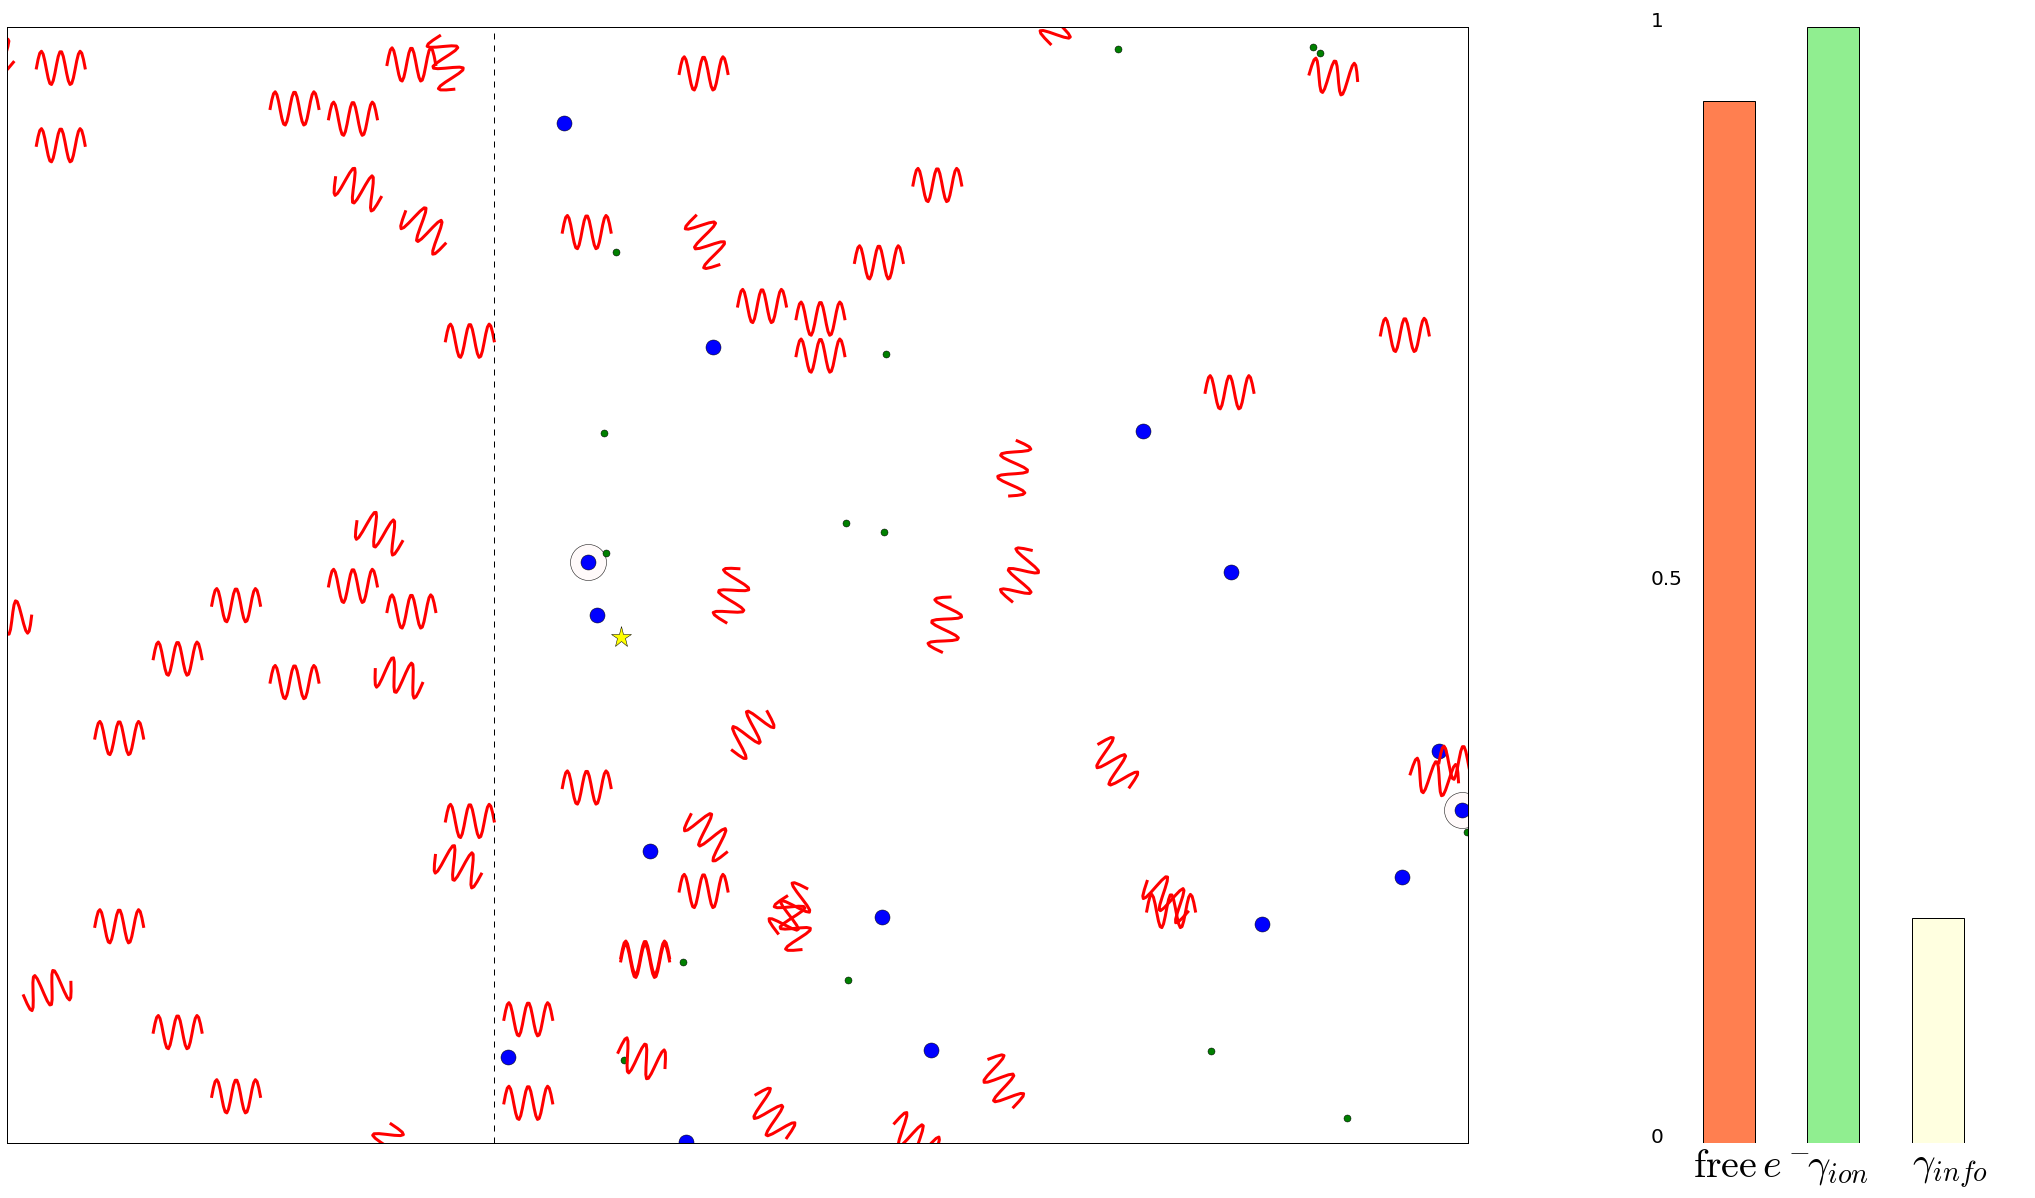

In [4]:
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
import mayavi.mlab as mlab
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

###Video params
fps=20.
t_tot=30.    ##time in secondes

nbt = t_tot * fps
dt = 1.

###Box size

box_x = 100
box_y = 100
box_x_sup = 50

###factor to draw photons
fact = 1.5
tab_sin = fact*np.sin(np.linspace(0,5*np.pi,30))
tab_support = np.linspace(0,5,30)

###Part to define the initial conditions for the particles

Min_v_e = 1
Min_v_p = 0.3
Min_v_ph = 3

fact_v_e = 2
fact_v_p = 1.5
#fact_v_ph = 4

nb_part = 15    ###@number of protons and electrons
nb_photons = 10000
nb_ps = 2  ###Number photons created per shot
Delta_t_shot = .1 ###time between each shot
arr_ind = np.arange(nb_part+nb_photons)

##protons
p_x = np.random.rand(nb_part) * box_x
p_y = np.random.rand(nb_part) * box_y

p_thetha = np.random.rand(nb_part) * 2*np.pi
p_v = np.random.rand(nb_part) * fact_v_p  + Min_v_p

##electrons
e_x = np.random.rand(nb_part) * box_x
e_y = np.random.rand(nb_part) * box_y

e_thetha = np.random.rand(nb_part) * 2*np.pi
e_v = np.random.rand(nb_part) * fact_v_e  + Min_v_e

##photons (can be nb_part photons more at the maximum)
ph_x = np.zeros(nb_photons+nb_part) - box_x_sup   ###All photons will be generate from left side of the box
ph_y = np.random.rand(nb_photons+nb_part) * box_y

ph_thetha = np.zeros(nb_photons+nb_part)   ###All photons start to move to the right
ph_v = np.zeros(nb_photons+nb_part) + Min_v_ph

ph_exist = np.zeros(nb_photons+nb_part,int)+1   ###A photon still exist
ph_exist[nb_ps:]=0



ph_sortie = np.zeros(nb_photons,int)      ###Only for the initial photons , 0: not exit yet,
                                          ####1 : exit without interact, 2 : exit after interaction
ph_interact = np.zeros(nb_photons,int)

ph_appear = np.zeros(nb_photons+nb_part)  ###Array to draw a star at the apparition place for Nframes
ph_x_appear = np.zeros(nb_photons+nb_part)
ph_y_appear = np.zeros(nb_photons+nb_part)
Nframes = 10

###Interction parameter

e_with = np.zeros(nb_part, int)-1  ##Array to know with which proton is associated the electron
p_with = np.zeros(nb_part, int)-1  ##Array to know with which electron is associated the proton
e_phi = np.random.rand(nb_part)*2*np.pi


cross_pe = 3.  ###define the distance to interact
cross_pp = 3.
cross_ee = 3.
cross_phe = 5




fig_mpl= plt.figure(figsize=(36,20), facecolor='white')
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
#ax.layout(xaxis=dict(domain=[0., 0.8]),xaxis2=dict(domain=[0., 0.8]) )
ax = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax.plot(p_x, p_y, marker=u'o', color='blue', markersize=15, linestyle='None')  ####protons
ax.plot(e_x, e_y, marker=u'o', color='green', markersize=5, linestyle='None')  ####electrons
ax.plot([0, 0], [0,box_y], '--', color='black')
ax.set_xlim( (-box_x_sup, box_x) )
ax.set_ylim( (0, box_y) )


cpt = Delta_t_shot
nb_ph_generates = nb_ps

def make_frame_mpl(t):
    global p_x, p_y, p_thetha, p_v,  e_x, e_y, e_thetha, e_v, ph_x, ph_y, ph_thetha, ph_v, cpt, nb_ph_generates, ph_sortie, ph_interact
    #mlab.clf() # clear the figure (to reset the colors)
    ax.clear()
    ax2.clear()
    #ax.axis('off')
    
    #print 't=',t
    
    if (t > cpt) and (nb_ph_generates + nb_ps < nb_photons) :
        cpt = cpt + Delta_t_shot
        ph_exist[nb_ph_generates : nb_ph_generates + nb_ps] = 1
        nb_ph_generates = nb_ph_generates + nb_ps
    
    p_x = p_x + dt * p_v*np.cos(p_thetha)
    p_y = p_y + dt * p_v*np.sin(p_thetha)
    
    tmp_n = np.where(e_with < 0)
    e_x[tmp_n] = e_x[tmp_n] + dt * e_v[tmp_n]*np.cos(e_thetha[tmp_n])
    e_y[tmp_n] = e_y[tmp_n] + dt * e_v[tmp_n]*np.sin(e_thetha[tmp_n])
    
    tmp_y = np.where(e_with >= 0)
    e_x[tmp_y] = p_x[e_with[tmp_y]] + 2*np.cos(2*t+e_phi[tmp_y])
    e_y[tmp_y] = p_y[e_with[tmp_y]]+ 2*np.sin(2*t+e_phi[tmp_y])
    
    ##Photons
    tmp_exist = np.where(ph_exist == 1)  ###We move only the existing ones
    ph_x[tmp_exist] = ph_x[tmp_exist] + dt * ph_v[tmp_exist]*np.cos(ph_thetha[tmp_exist])
    ph_y[tmp_exist] = ph_y[tmp_exist] + dt * ph_v[tmp_exist]*np.sin(ph_thetha[tmp_exist])
    
    tmp = np.where( (p_x > box_x) | (p_x < 0) )
    p_x[tmp] = p_x[tmp] - 2* dt * p_v[tmp]*np.cos(p_thetha[tmp])
    p_thetha[tmp] = np.pi-p_thetha[tmp]
    tmp = np.where( (p_y > box_y) | (p_y < 0) )
    p_y[tmp] = p_y[tmp] -2* dt * p_v[tmp]*np.sin(p_thetha[tmp])
    p_thetha[tmp] = 2*np.pi-p_thetha[tmp]
    
    
    tmp = np.where( (e_x > box_x) | (e_x < 0) )
    e_x[tmp] = e_x[tmp] - 2* dt * e_v[tmp]*np.cos(e_thetha[tmp])
    e_thetha[tmp] = np.pi-e_thetha[tmp]
    tmp = np.where( (e_y > box_y) | (e_y < 0) )
    e_y[tmp] = e_y[tmp] -2* dt * e_v[tmp]*np.sin(e_thetha[tmp])
    e_thetha[tmp] = 2*np.pi-e_thetha[tmp]
    
    tmp = np.where( (ph_x > box_x) | (ph_x < -box_x_sup) )
    ph_exist[tmp] = 0
    for i in range(len(ph_exist[tmp])):
        if tmp[0][i] < nb_photons: 
            if ph_interact[tmp[0][i]] == 0 : ph_sortie[tmp[0][i]]=1
            else : ph_sortie[tmp[0][i]]=2
    #ph_x[tmp] = ph_x[tmp] - 2* dt * ph_v[tmp]*np.cos(ph_thetha[tmp])
    #ph_thetha[tmp] = np.pi-ph_thetha[tmp]
    tmp = np.where( (ph_y > box_y) | (ph_y < 0) )
    ph_exist[tmp] = 0
    for i in range(len(ph_exist[tmp])):
        #print tmp[0]
        if tmp[0][i] < nb_photons:
            if ph_interact[tmp[0][i]] == 0 : ph_sortie[tmp[0][i]]=1
            else : ph_sortie[tmp[0][i]]=2
    #ph_y[tmp] = ph_y[tmp] -2* dt * ph_v[tmp]*np.sin(ph_thetha[tmp])
    #ph_thetha[tmp] = 2*np.pi-ph_thetha[tmp]
    
    ###Part to search interacting electrons with free protons
 
    for i in range(nb_part):
        tmp_pn = np.where( p_with < 0 )    ###select only free protons
        if len(p_with[tmp_pn]) > 0 :       ###Continue only if there are free protons
            if e_with[i] < 0:
                tab_dist_pe = np.sqrt( np.power(p_x[tmp_pn] - e_x[i],2) + np.power(p_y[tmp_pn] - e_y[i],2) )
                if tab_dist_pe.min() < cross_pe: 
                    ind_min = int(np.argmin(tab_dist_pe))
                    tab = arr_ind[tmp_pn]
                    e_with[i] = tab[ind_min]
                    p_with[e_with[i]] = i
                    ##creation of a photon
                    tmp_phex = np.where(ph_exist == 0)
                    ind_min = int(np.argmin(tmp_phex))
                    tab = arr_ind[tmp_phex]
                    ind_min = tab[ind_min]
                    ph_exist[ind_min] = 1
                    ph_x[ind_min] = e_x[i] + 5.*(box_x/2. - e_x[i])/np.sqrt((box_x/2. - e_x[i])**2)
                    ph_y[ind_min] = e_y[i] + 5.*(box_y/2. - e_y[i])/np.sqrt((box_y/2. - e_y[i])**2)
                    ph_x_appear[ind_min] = ph_x[ind_min]
                    ph_y_appear[ind_min] = ph_y[ind_min]
                    ph_appear[ind_min] = Nframes
                    

                
    ###Part to search the interaction photon-electron and photon-proton
    for i in range(nb_photons+nb_part):
        tmp_en = np.where( e_with < 0 )    ###select only free electrons
        if len(e_with[tmp_en]) > 0 :       ###Continue only if there are free protons
            if ph_exist[i] == 1:
                tab_dist_phe = np.sqrt( np.power(e_x[tmp_en] - ph_x[i],2) + np.power(e_y[tmp_en] - ph_y[i],2) )
                if tab_dist_phe.min() < cross_phe:
                    delta_l = np.random.rand(1)*2
                    dtheta = np.arccos(1-delta_l)
                    ph_thetha[i] = ph_thetha[i] + dtheta
                    if i < nb_photons : ph_interact[i] = 1
                    
    ###Part to search the interaction photon - electron in atom
    for i in range(nb_photons+nb_part):
        tmp_en = np.where( e_with > 0 )    ###select only linked electrons
        assoc_elec = len(e_with[tmp_en])
        if len(e_with[tmp_en]) > 0 :       ###Continue only if there are linked electrons
            if ph_exist[i] == 1:
                tab_dist_phe = np.sqrt( np.power(e_x[tmp_en] - ph_x[i],2) + np.power(e_y[tmp_en] - ph_y[i],2) )
                if tab_dist_phe.min() < cross_phe:
                    ind_min = int(np.argmin(tab_dist_phe))
                    tab = arr_ind[tmp_en]
                    p_with[e_with[tab[ind_min]]] = -1
                    e_with[tab[ind_min]] = -1  ###Not linked anymore
                    ph_exist[i] = 0
                    if i < nb_photons : 
                        ph_interact[i] = 1
                        ph_sortie[i] = 2
                    
                    e_x[tab[ind_min]] = e_x[tab[ind_min]] + 5.*(box_x/2. - e_x[tab[ind_min]])/np.sqrt((box_x/2. - e_x[tab[ind_min]])**2)
                    e_y[tab[ind_min]] = e_y[tab[ind_min]] + 5.*(box_y/2. - e_y[tab[ind_min]])/np.sqrt((box_y/2. - e_y[tab[ind_min]])**2)


                    
    
    ####Part to draw the particles
    ax.plot(p_x[e_with[tmp_y]], p_y[e_with[tmp_y]], marker=u'o', color='snow', markersize=36, linestyle='None')
    ax.plot(p_x, p_y, marker=u'o', color='blue', markersize=15, linestyle='None')  ####protons
    ax.plot(e_x, e_y, marker=u'o', color='green', markersize=7, linestyle='None')  ####electrons
    
    for i in range(nb_photons+nb_part):
        if ph_appear[i] > 0:
            ax.plot(ph_x_appear[i], ph_y_appear[i], marker =u'*', color='yellow', markersize = 20+ph_appear[i] )
            ph_appear[i] = ph_appear[i] - 1
    
    for i in range(nb_photons+nb_part):
        if ph_exist[i] == 1:
            x_draw = np.cos(ph_thetha[i])*tab_support - np.sin(ph_thetha[i])*tab_sin
            y_draw = np.sin(ph_thetha[i])*tab_support + np.cos(ph_thetha[i])*tab_sin
            ax.plot(x_draw+ph_x[i], y_draw+ph_y[i], color='red', linewidth=3)
            
    
    tmp_s1 = np.where(ph_sortie == 1)
    tmp_s2 = np.where(ph_sortie == 2)
    
    nb_s1 = len(ph_sortie[tmp_s1[0]])
    nb_s2 = len(ph_sortie[tmp_s2[0]])
    if nb_s1+nb_s2 > 0 : ratio_ph_info = nb_s1*1./(nb_s1+nb_s2) 
    else: ratio_ph_info = 0
    print nb_s1, nb_s2
    
    ax.plot([0, 0], [0,box_y], '--', color='black')
    ax.set_xlim( (-box_x_sup, box_x) )
    ax.set_ylim( (0, box_y) )
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    ratio_free_elec = 1.-assoc_elec*1./nb_part
    ratio_ion_phot = 1.
    ax2.bar(1, ratio_free_elec, 1,color='coral')
    ax2.bar(3, ratio_ion_phot, 1,color='lightgreen')
    ax2.bar(5, ratio_ph_info, 1,color='lightyellow')
    ax2.set_ylim(0,1)
    ax2.set_xlim(0,7)
    #ax2.set_xticklabels(['free $e^-$', '$\gamma_{ion}$'])
    #ax2.set_xticks([1.5,3.5])
    ax2.tick_params(axis='both', which='major', labelsize=40)
    ax2.set_axis_off()
    ax2.text(0.8, -0.03 , '$\mathrm{free}\, e^-$', fontsize=40)
    ax2.text(3., -0.03 , '$\gamma_{ion}$', fontsize=40)
    ax2.text(5., -0.03 , '$\gamma_{info}$', fontsize=40)
    ax2.text(0,0,'0', fontsize=20)
    ax2.text(0,0.5,'0.5', fontsize=20)
    ax2.text(0,1.,'1', fontsize=20)
    
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=nbt/fps)
animation.write_gif("Strait_Photons_Protons_Electrons_Interact_bar_evol_15.gif", fps=fps)

# FOG with photon WITH energy variation.


[MoviePy] Building file Strait_Photons_Protons_Electrons_Interact_bar_Energy_evol_15.gif with imageio


100%|█████████▉| 600/601 [03:48<00:00,  2.81it/s]


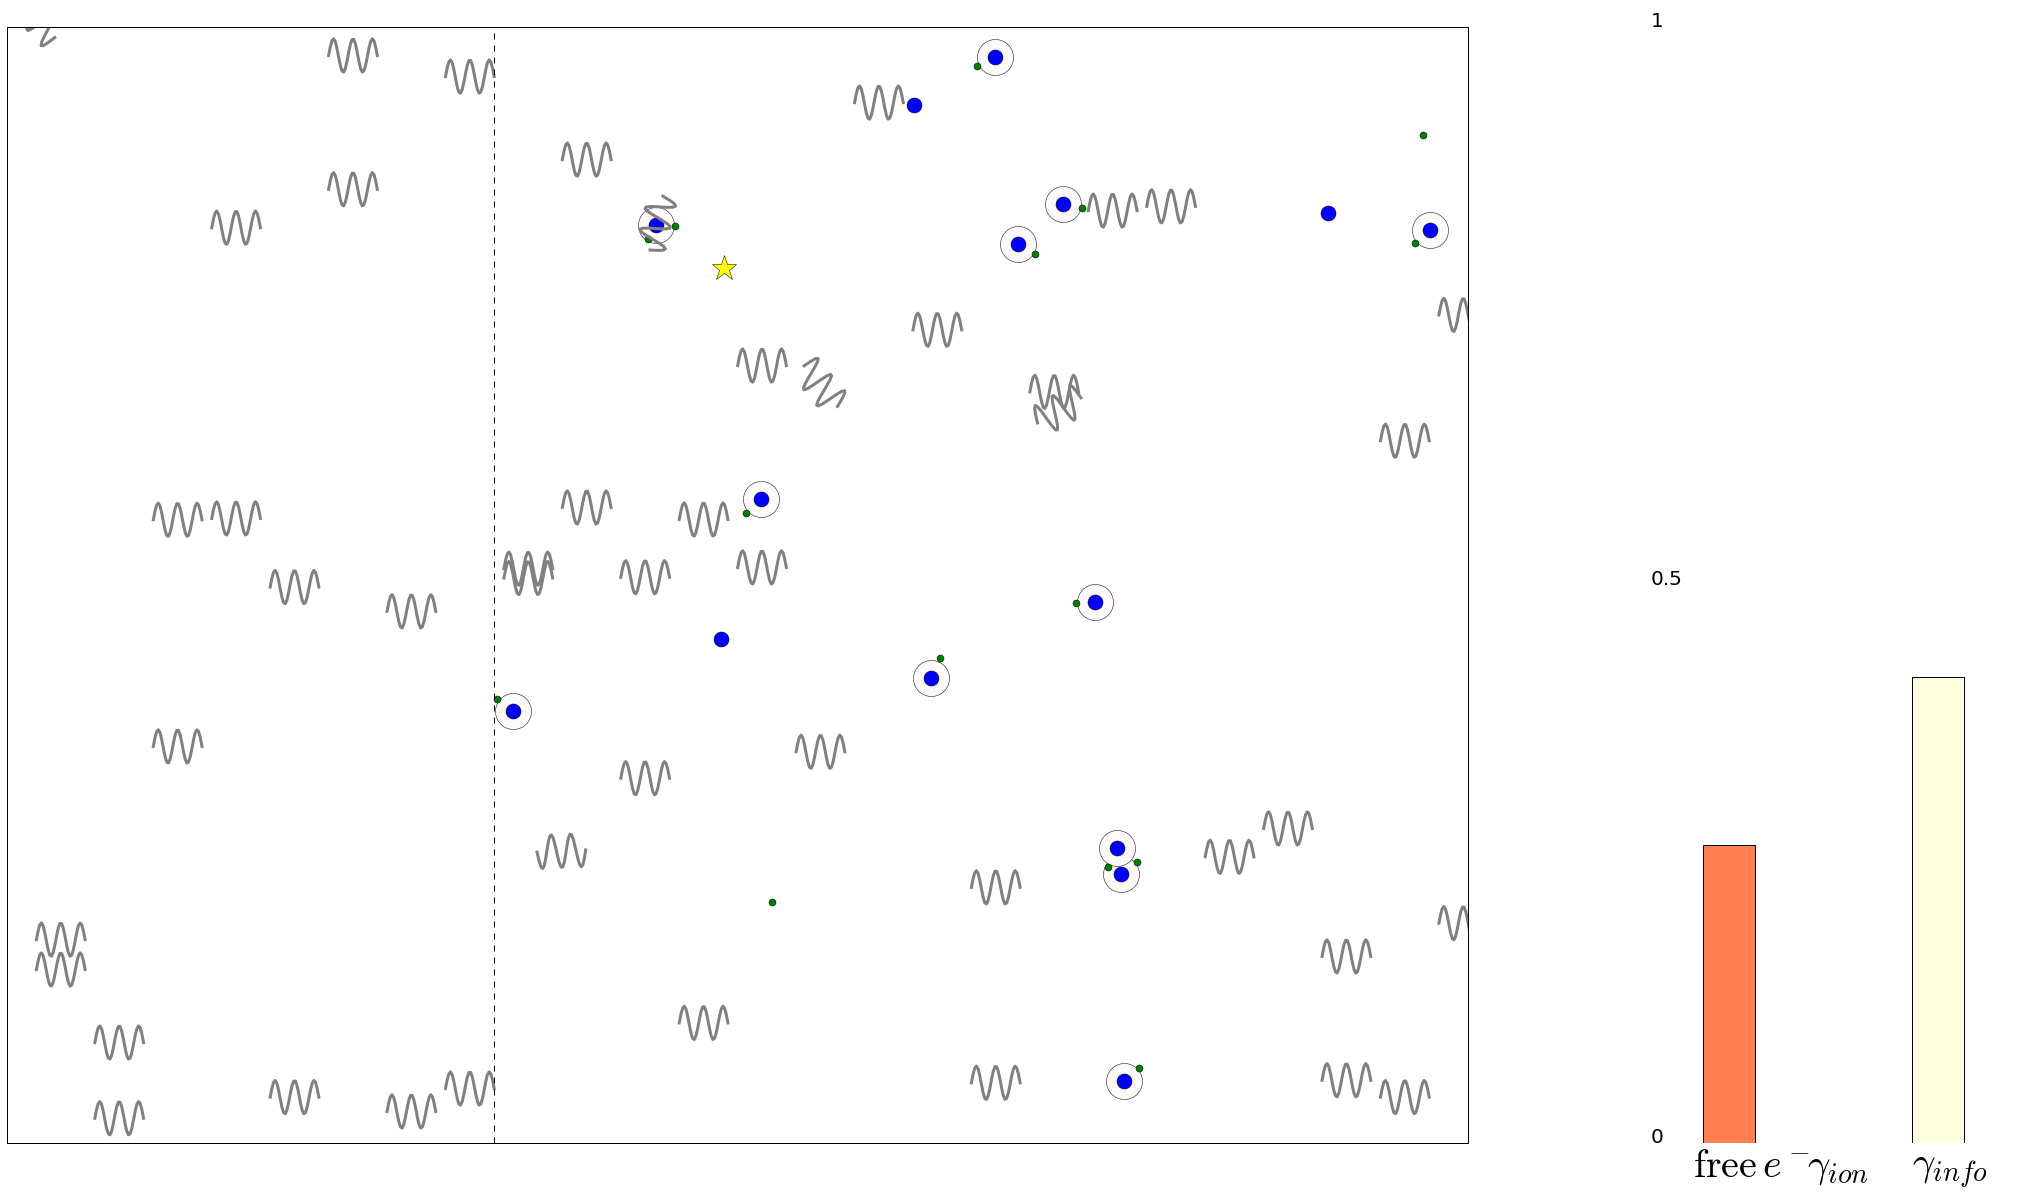

In [3]:
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
import mayavi.mlab as mlab
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

###Video params
fps=20.
t_tot=30.    ##time in secondes

nbt = t_tot * fps
dt = 1.

###Box size

box_x = 100
box_y = 100
box_x_sup = 50

###factor to draw photons
fact = 1.5
tab_sin = fact*np.sin(np.linspace(0,5*np.pi,30))
tab_support = np.linspace(0,5,30)

###Part to define the initial conditions for the particles

Min_v_e = 1
Min_v_p = 0.3
Min_v_ph = 3

fact_v_e = 2
fact_v_p = 1.5
#fact_v_ph = 4

nb_part = 15    ###@number of protons and electrons
nb_photons = 10000
nb_ps = 2  ###Number photons created per shot
Delta_t_shot = .1 ###time between each shot
arr_ind = np.arange(nb_part+nb_photons)

##protons
p_x = np.random.rand(nb_part) * box_x
p_y = np.random.rand(nb_part) * box_y

p_thetha = np.random.rand(nb_part) * 2*np.pi
p_v = np.random.rand(nb_part) * fact_v_p  + Min_v_p

##electrons
e_x = np.random.rand(nb_part) * box_x
e_y = np.random.rand(nb_part) * box_y

e_thetha = np.random.rand(nb_part) * 2*np.pi
e_v = np.random.rand(nb_part) * fact_v_e  + Min_v_e

##photons (can be nb_part photons more at the maximum)
ph_x = np.zeros(nb_photons+nb_part) - box_x_sup   ###All photons will be generate from left side of the box
ph_y = np.random.rand(nb_photons+nb_part) * box_y

ph_thetha = np.zeros(nb_photons+nb_part)   ###All photons start to move to the right
ph_v = np.zeros(nb_photons+nb_part) + Min_v_ph

ph_exist = np.zeros(nb_photons+nb_part,int)+1   ###A photon still exist
ph_exist[nb_ps:]=0


ion_energy = 13.6  ##in electron-Volt
min_energy = 20.  ### => all photons are initialy able to ionized
delta_energy = 200.

ph_energy = np.random.rand(nb_photons+nb_part)*delta_energy + min_energy  #in electron-Volt at initial time


ph_sortie = np.zeros(nb_photons,int)      ###Only for the initial photons , 0: not exit yet,
                                          ####1 : exit without interact, 2 : exit after interaction
ph_interact = np.zeros(nb_photons,int)

ph_appear = np.zeros(nb_photons+nb_part)  ###Array to draw a star at the apparition place for Nframes
ph_x_appear = np.zeros(nb_photons+nb_part)
ph_y_appear = np.zeros(nb_photons+nb_part)
Nframes = 10

###Interction parameter

e_with = np.zeros(nb_part, int)-1  ##Array to know with which proton is associated the electron
p_with = np.zeros(nb_part, int)-1  ##Array to know with which electron is associated the proton
e_phi = np.random.rand(nb_part)*2*np.pi


cross_pe = 3.  ###define the distance to interact
cross_pp = 3.
cross_ee = 3.
cross_phe = 5




fig_mpl= plt.figure(figsize=(36,20), facecolor='white')
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
#ax.layout(xaxis=dict(domain=[0., 0.8]),xaxis2=dict(domain=[0., 0.8]) )
ax = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax.plot(p_x, p_y, marker=u'o', color='blue', markersize=15, linestyle='None')  ####protons
ax.plot(e_x, e_y, marker=u'o', color='green', markersize=5, linestyle='None')  ####electrons
ax.plot([0, 0], [0,box_y], '--', color='black')
ax.set_xlim( (-box_x_sup, box_x) )
ax.set_ylim( (0, box_y) )


cpt = Delta_t_shot
nb_ph_generates = nb_ps

def make_frame_mpl(t):
    global p_x, p_y, p_thetha, p_v,  e_x, e_y, e_thetha, e_v, ph_x, ph_y
    global ph_thetha, ph_v, cpt, nb_ph_generates, ph_sortie, ph_interact, ph_energy
    #mlab.clf() # clear the figure (to reset the colors)
    ax.clear()
    ax2.clear()
    #ax.axis('off')
    
    #print 't=',t
    
    ###Energy evolution with time
    ph_energy_ev = ph_energy/(1.+t) 
    
    if (t > cpt) and (nb_ph_generates + nb_ps < nb_photons) :
        cpt = cpt + Delta_t_shot
        ph_exist[nb_ph_generates : nb_ph_generates + nb_ps] = 1
        nb_ph_generates = nb_ph_generates + nb_ps
    
    p_x = p_x + dt * p_v*np.cos(p_thetha)
    p_y = p_y + dt * p_v*np.sin(p_thetha)
    
    tmp_n = np.where(e_with < 0)
    e_x[tmp_n] = e_x[tmp_n] + dt * e_v[tmp_n]*np.cos(e_thetha[tmp_n])
    e_y[tmp_n] = e_y[tmp_n] + dt * e_v[tmp_n]*np.sin(e_thetha[tmp_n])
    
    tmp_y = np.where(e_with >= 0)
    e_x[tmp_y] = p_x[e_with[tmp_y]] + 2*np.cos(2*t+e_phi[tmp_y])
    e_y[tmp_y] = p_y[e_with[tmp_y]]+ 2*np.sin(2*t+e_phi[tmp_y])
    
    ##Photons
    tmp_exist = np.where(ph_exist == 1)  ###We move only the existing ones
    ph_x[tmp_exist] = ph_x[tmp_exist] + dt * ph_v[tmp_exist]*np.cos(ph_thetha[tmp_exist])
    ph_y[tmp_exist] = ph_y[tmp_exist] + dt * ph_v[tmp_exist]*np.sin(ph_thetha[tmp_exist])
    
    tmp = np.where( (p_x > box_x) | (p_x < 0) )
    p_x[tmp] = p_x[tmp] - 2* dt * p_v[tmp]*np.cos(p_thetha[tmp])
    p_thetha[tmp] = np.pi-p_thetha[tmp]
    tmp = np.where( (p_y > box_y) | (p_y < 0) )
    p_y[tmp] = p_y[tmp] -2* dt * p_v[tmp]*np.sin(p_thetha[tmp])
    p_thetha[tmp] = 2*np.pi-p_thetha[tmp]
    
    
    tmp = np.where( (e_x > box_x) | (e_x < 0) )
    e_x[tmp] = e_x[tmp] - 2* dt * e_v[tmp]*np.cos(e_thetha[tmp])
    e_thetha[tmp] = np.pi-e_thetha[tmp]
    tmp = np.where( (e_y > box_y) | (e_y < 0) )
    e_y[tmp] = e_y[tmp] -2* dt * e_v[tmp]*np.sin(e_thetha[tmp])
    e_thetha[tmp] = 2*np.pi-e_thetha[tmp]
    
    tmp = np.where( (ph_x > box_x) | (ph_x < -box_x_sup) )
    ph_exist[tmp] = 0
    for i in range(len(ph_exist[tmp])):
        if tmp[0][i] < nb_photons: 
            if ph_interact[tmp[0][i]] == 0 : ph_sortie[tmp[0][i]]=1
            else : ph_sortie[tmp[0][i]]=2
    #ph_x[tmp] = ph_x[tmp] - 2* dt * ph_v[tmp]*np.cos(ph_thetha[tmp])
    #ph_thetha[tmp] = np.pi-ph_thetha[tmp]
    tmp = np.where( (ph_y > box_y) | (ph_y < 0) )
    ph_exist[tmp] = 0
    for i in range(len(ph_exist[tmp])):
        #print tmp[0]
        if tmp[0][i] < nb_photons:
            if ph_interact[tmp[0][i]] == 0 : ph_sortie[tmp[0][i]]=1
            else : ph_sortie[tmp[0][i]]=2
    #ph_y[tmp] = ph_y[tmp] -2* dt * ph_v[tmp]*np.sin(ph_thetha[tmp])
    #ph_thetha[tmp] = 2*np.pi-ph_thetha[tmp]
    
    ###Part to search interacting electrons with free protons
 
    for i in range(nb_part):
        tmp_pn = np.where( p_with < 0 )    ###select only free protons
        if len(p_with[tmp_pn]) > 0 :       ###Continue only if there are free protons
            if e_with[i] < 0:
                tab_dist_pe = np.sqrt( np.power(p_x[tmp_pn] - e_x[i],2) + np.power(p_y[tmp_pn] - e_y[i],2) )
                if tab_dist_pe.min() < cross_pe: 
                    ind_min = int(np.argmin(tab_dist_pe))
                    tab = arr_ind[tmp_pn]
                    e_with[i] = tab[ind_min]
                    p_with[e_with[i]] = i
                    ##creation of a photon
                    tmp_phex = np.where(ph_exist == 0)
                    ind_min = int(np.argmin(tmp_phex))
                    tab = arr_ind[tmp_phex]
                    ind_min = tab[ind_min]
                    ph_exist[ind_min] = 1
                    ph_x[ind_min] = e_x[i] + 5.*(box_x/2. - e_x[i])/np.sqrt((box_x/2. - e_x[i])**2)
                    ph_y[ind_min] = e_y[i] + 5.*(box_y/2. - e_y[i])/np.sqrt((box_y/2. - e_y[i])**2)
                    ph_x_appear[ind_min] = ph_x[ind_min]
                    ph_y_appear[ind_min] = ph_y[ind_min]
                    ph_appear[ind_min] = Nframes
                    

                
    ###Part to search the interaction photon-electron and photon-proton
    for i in range(nb_photons+nb_part):
        tmp_en = np.where( e_with < 0 )    ###select only free electrons
        if len(e_with[tmp_en]) > 0 :       ###Continue only if there are free protons
            if ph_exist[i] == 1:
                tab_dist_phe = np.sqrt( np.power(e_x[tmp_en] - ph_x[i],2) + np.power(e_y[tmp_en] - ph_y[i],2) )
                if tab_dist_phe.min() < cross_phe:
                    delta_l = np.random.rand(1)*2
                    dtheta = np.arccos(1-delta_l)
                    ph_thetha[i] = ph_thetha[i] + dtheta
                    if i < nb_photons : ph_interact[i] = 1
                    
    ###Part to search the interaction photon - electron in atom
    for i in range(nb_photons+nb_part):
        if ph_energy_ev[i] < ion_energy: continue
        if ph_exist[i] == 0: continue
        tmp_en = np.where( e_with > 0 )    ###select only linked electrons
        assoc_elec = len(e_with[tmp_en])
        if len(e_with[tmp_en]) > 0 :       ###Continue only if there are linked electrons
            if ph_exist[i] == 1:
                tab_dist_phe = np.sqrt( np.power(e_x[tmp_en] - ph_x[i],2) + np.power(e_y[tmp_en] - ph_y[i],2) )
                if tab_dist_phe.min() < cross_phe:
                    ind_min = int(np.argmin(tab_dist_phe))
                    tab = arr_ind[tmp_en]
                    p_with[e_with[tab[ind_min]]] = -1
                    e_with[tab[ind_min]] = -1  ###Not linked anymore
                    ph_exist[i] = 0
                    if i < nb_photons : 
                        ph_interact[i] = 1
                        ph_sortie[i] = 2
                    
                    e_x[tab[ind_min]] = e_x[tab[ind_min]] + 5.*(box_x/2. - e_x[tab[ind_min]])/np.sqrt((box_x/2. - e_x[tab[ind_min]])**2)
                    e_y[tab[ind_min]] = e_y[tab[ind_min]] + 5.*(box_y/2. - e_y[tab[ind_min]])/np.sqrt((box_y/2. - e_y[tab[ind_min]])**2)


                    
    tmp_en = np.where( e_with > 0 )    ###select only linked electrons
    assoc_elec = len(e_with[tmp_en])
    ####Part to draw the particles
    ax.plot(p_x[e_with[tmp_y]], p_y[e_with[tmp_y]], marker=u'o', color='snow', markersize=36, linestyle='None')
    ax.plot(p_x, p_y, marker=u'o', color='blue', markersize=15, linestyle='None')  ####protons
    ax.plot(e_x, e_y, marker=u'o', color='green', markersize=7, linestyle='None')  ####electrons
    
    for i in range(nb_photons+nb_part):
        if ph_appear[i] > 0:
            ax.plot(ph_x_appear[i], ph_y_appear[i], marker =u'*', color='yellow', markersize = 20+ph_appear[i] )
            ph_appear[i] = ph_appear[i] - 1
    
    for i in range(nb_photons+nb_part):
        if ph_exist[i] == 1:
            x_draw = np.cos(ph_thetha[i])*tab_support - np.sin(ph_thetha[i])*tab_sin
            y_draw = np.sin(ph_thetha[i])*tab_support + np.cos(ph_thetha[i])*tab_sin
            if ph_energy_ev[i] > ion_energy: color='red'
            else: color='grey'
            ax.plot(x_draw+ph_x[i], y_draw+ph_y[i], color=color, linewidth=3)
            
    
    tmp_s1 = np.where(ph_sortie == 1)
    tmp_s2 = np.where(ph_sortie == 2)
    
    
    
    ###evaluate the fraction of photons exiting with initial information
    nb_s1 = len(ph_sortie[tmp_s1[0]])
    nb_s2 = len(ph_sortie[tmp_s2[0]])
    if nb_s1+nb_s2 > 0 : ratio_ph_info = nb_s1*1./(nb_s1+nb_s2) 
    else: ratio_ph_info = 0
    #print nb_s1, nb_s2
    
    ###evaluate the fraction of ionising photons
    tmp_ion = np.where(ph_energy_ev > ion_energy)
    nb_ion = len(ph_energy_ev[tmp_ion[0]])
    frac_ion = nb_ion*1./(nb_photons+nb_part)
    
    ax.plot([0, 0], [0,box_y], '--', color='black')
    ax.set_xlim( (-box_x_sup, box_x) )
    ax.set_ylim( (0, box_y) )
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    ratio_free_elec = 1.-assoc_elec*1./nb_part
    ratio_ion_phot = frac_ion
    ax2.bar(1, ratio_free_elec, 1,color='coral')
    ax2.bar(3, ratio_ion_phot, 1,color='lightgreen')
    ax2.bar(5, ratio_ph_info, 1,color='lightyellow')
    ax2.set_ylim(0,1)
    ax2.set_xlim(0,7)
    #ax2.set_xticklabels(['free $e^-$', '$\gamma_{ion}$'])
    #ax2.set_xticks([1.5,3.5])
    ax2.tick_params(axis='both', which='major', labelsize=40)
    ax2.set_axis_off()
    ax2.text(0.8, -0.03 , '$\mathrm{free}\, e^-$', fontsize=40)
    ax2.text(3., -0.03 , '$\gamma_{ion}$', fontsize=40)
    ax2.text(5., -0.03 , '$\gamma_{info}$', fontsize=40)
    ax2.text(0,0,'0', fontsize=20)
    ax2.text(0,0.5,'0.5', fontsize=20)
    ax2.text(0,1.,'1', fontsize=20)
    
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=nbt/fps)
animation.write_gif("Strait_Photons_Protons_Electrons_Interact_bar_Energy_evol_15.gif", fps=fps)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import

0
1
2
3
4
